In [45]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('co2_emissions (1) (2).csv')
df.head(10)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [47]:
df.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [49]:
df['cylinders'].value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: cylinders, dtype: int64

In [50]:
df.duplicated().sum()

1112

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

0

# Changing label into meaningful label

In [53]:
df["transmission"] = np.where(df["transmission"]=='A', "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"]=='AM', "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"]=='AS', "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"]=='AV', "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"]=='M', "Manual", df["transmission"])

In [54]:
df["fuel_type"] = np.where(df["fuel_type"]=="Z", "Premium Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="X", "Regular Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="D", "Diesel", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="E", "Ethanol(E85)", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="N", "Natural Gas", df["fuel_type"])

In [55]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


C:\Users\Siddhi\AppData\Local\Temp\ipykernel_17004\1282538523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

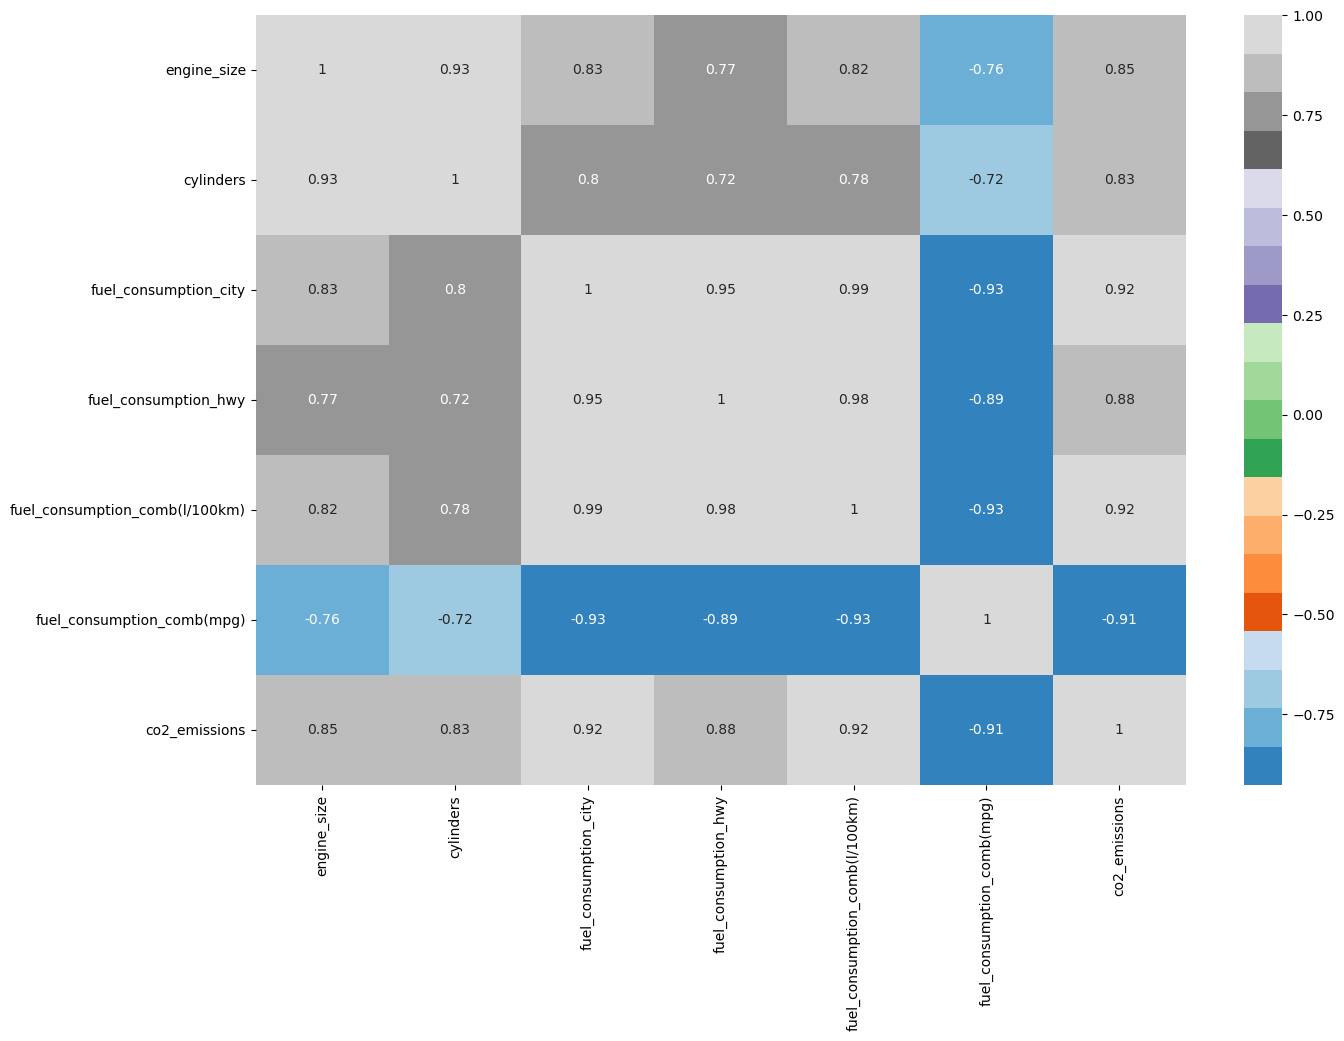

In [56]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='tab20c')

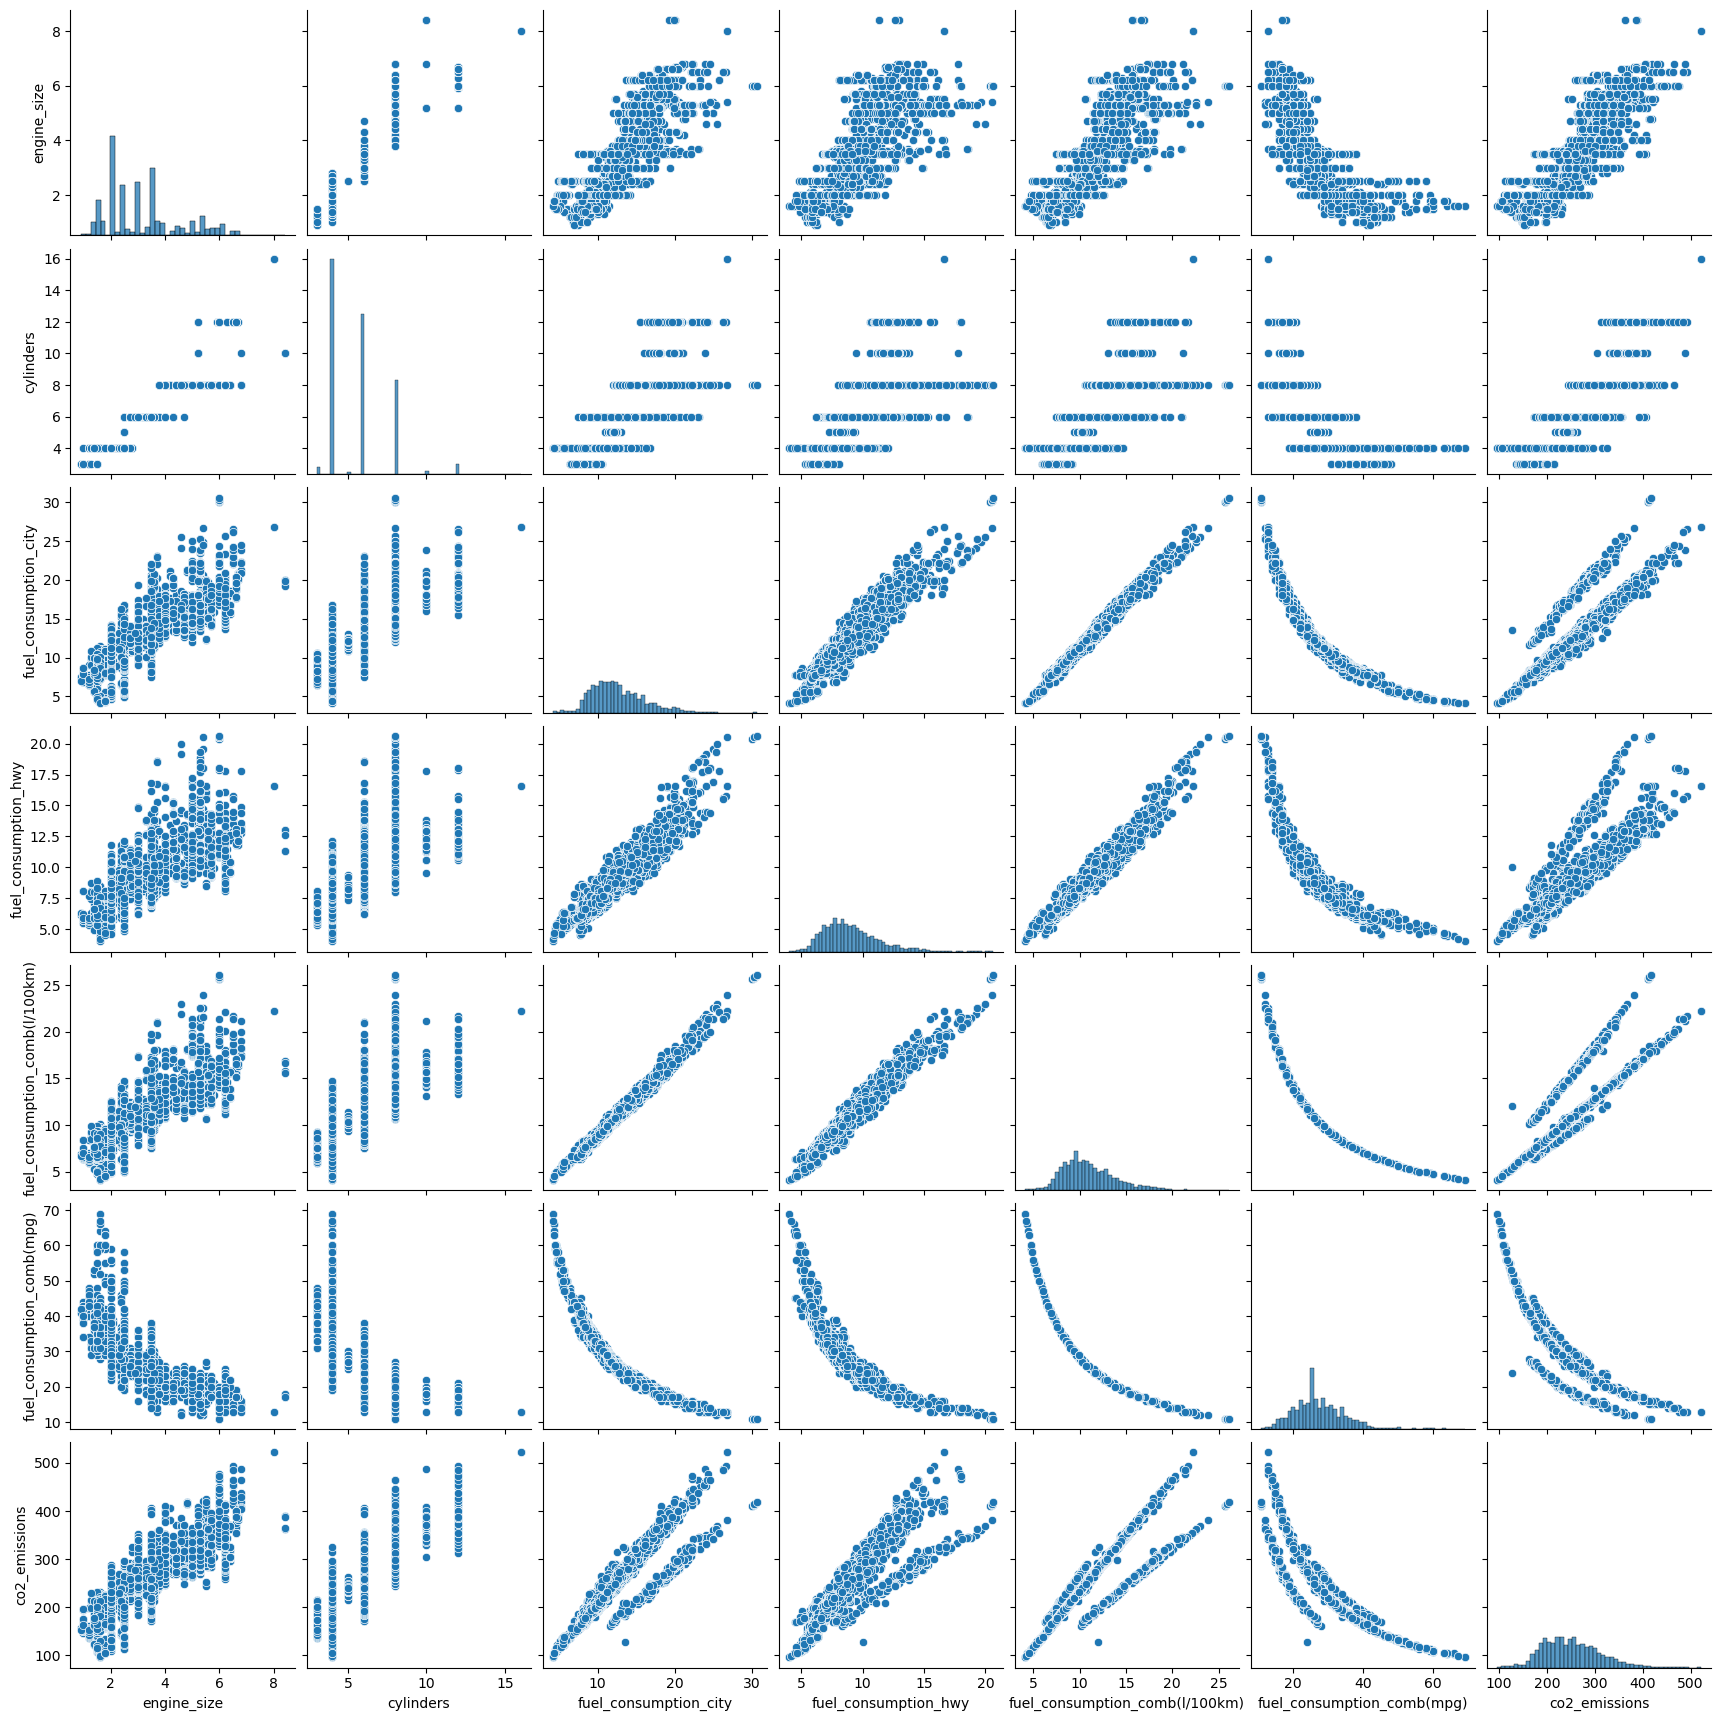

In [57]:
sns.pairplot(df)

-------------------------------------
Distribution plot for engine_size
-------------------------------------


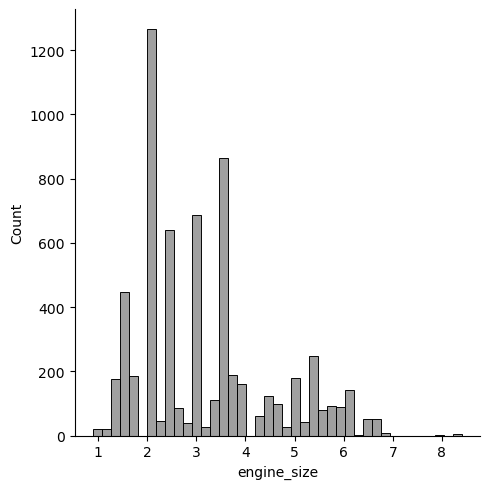

-------------------------------------
Distribution plot for cylinders
-------------------------------------


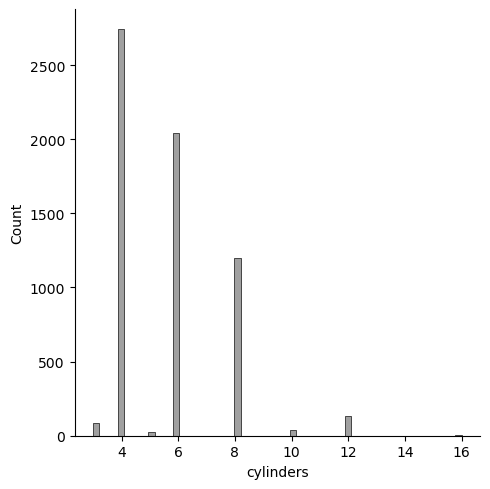

-------------------------------------
Distribution plot for fuel_consumption_city
-------------------------------------


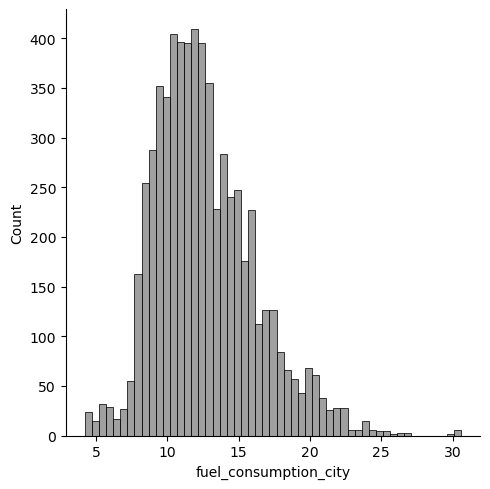

-------------------------------------
Distribution plot for fuel_consumption_hwy
-------------------------------------


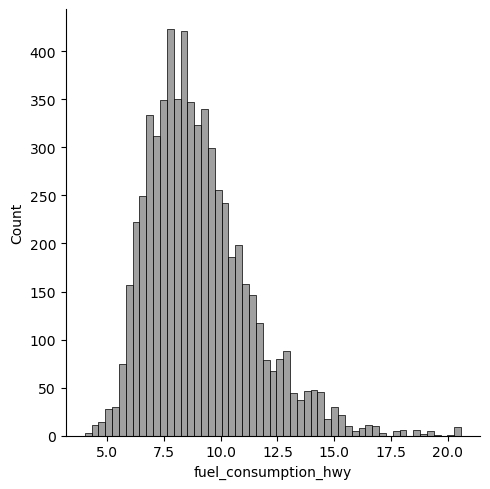

-------------------------------------
Distribution plot for fuel_consumption_comb(l/100km)
-------------------------------------


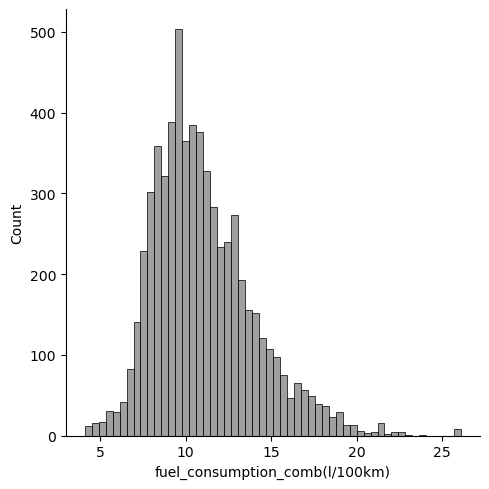

-------------------------------------
Distribution plot for fuel_consumption_comb(mpg)
-------------------------------------


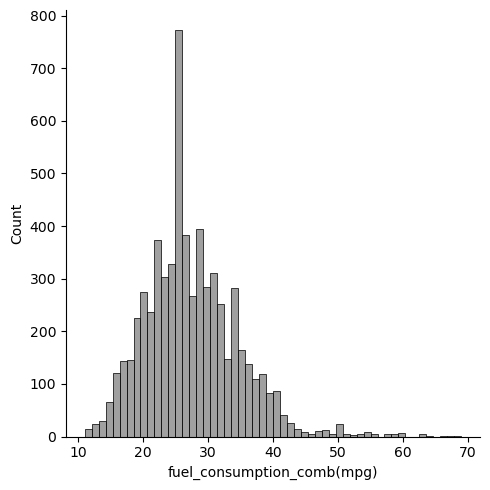

-------------------------------------
Distribution plot for co2_emissions
-------------------------------------


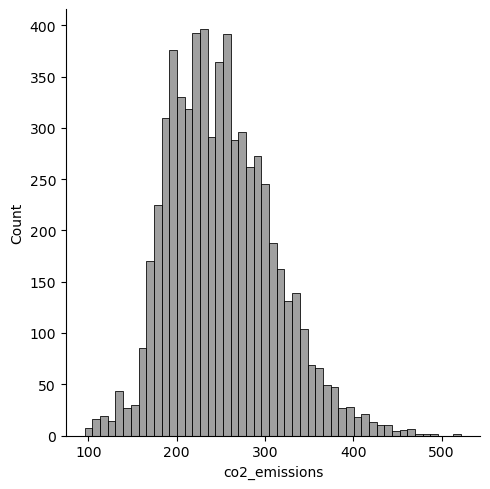

In [58]:
for i in df.columns:
  if  df[i].dtype =='float64' or df[i].dtype =='int64':
    print("-------------------------------------")
    print("Distribution plot for",i)
    print("-------------------------------------")
    sns.displot(df[i],color='grey')
    plt.show()

-------------------------------------
Boxplot plot for engine_size
-------------------------------------


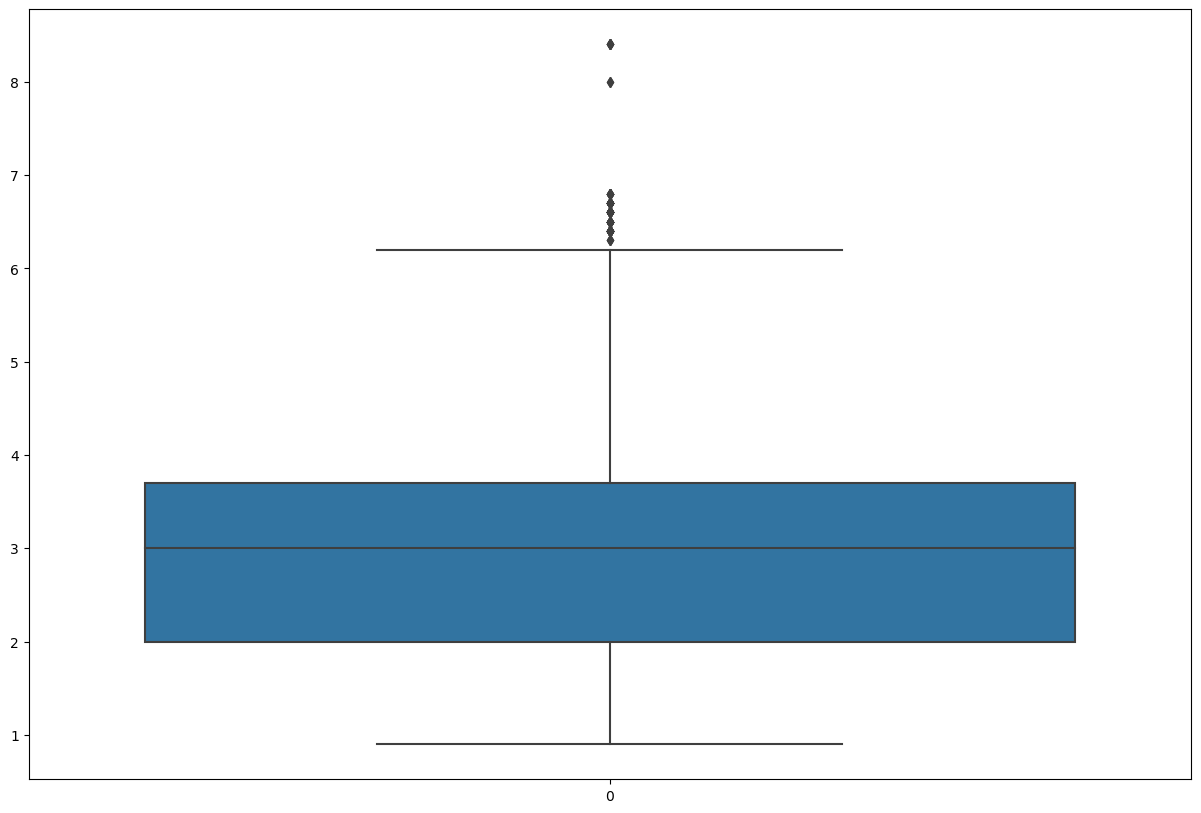

-------------------------------------
Boxplot plot for cylinders
-------------------------------------


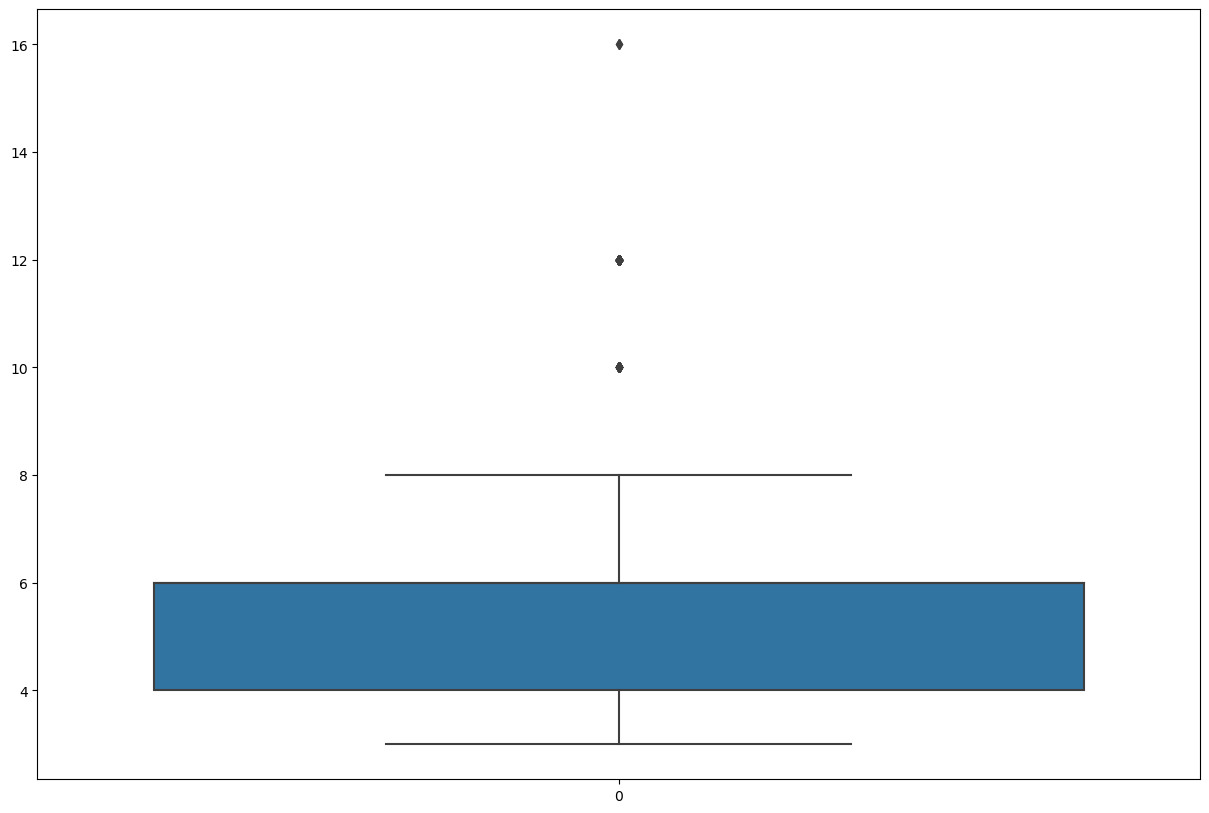

-------------------------------------
Boxplot plot for fuel_consumption_city
-------------------------------------


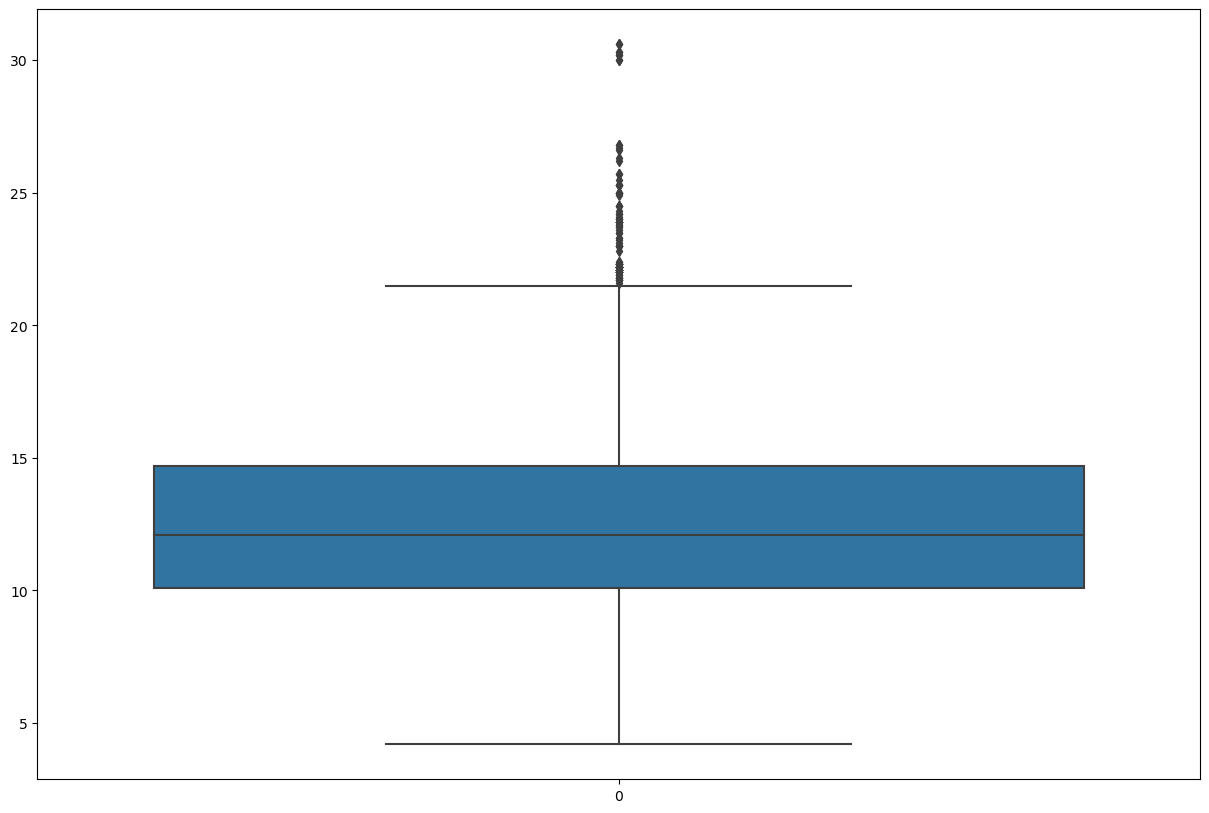

-------------------------------------
Boxplot plot for fuel_consumption_hwy
-------------------------------------


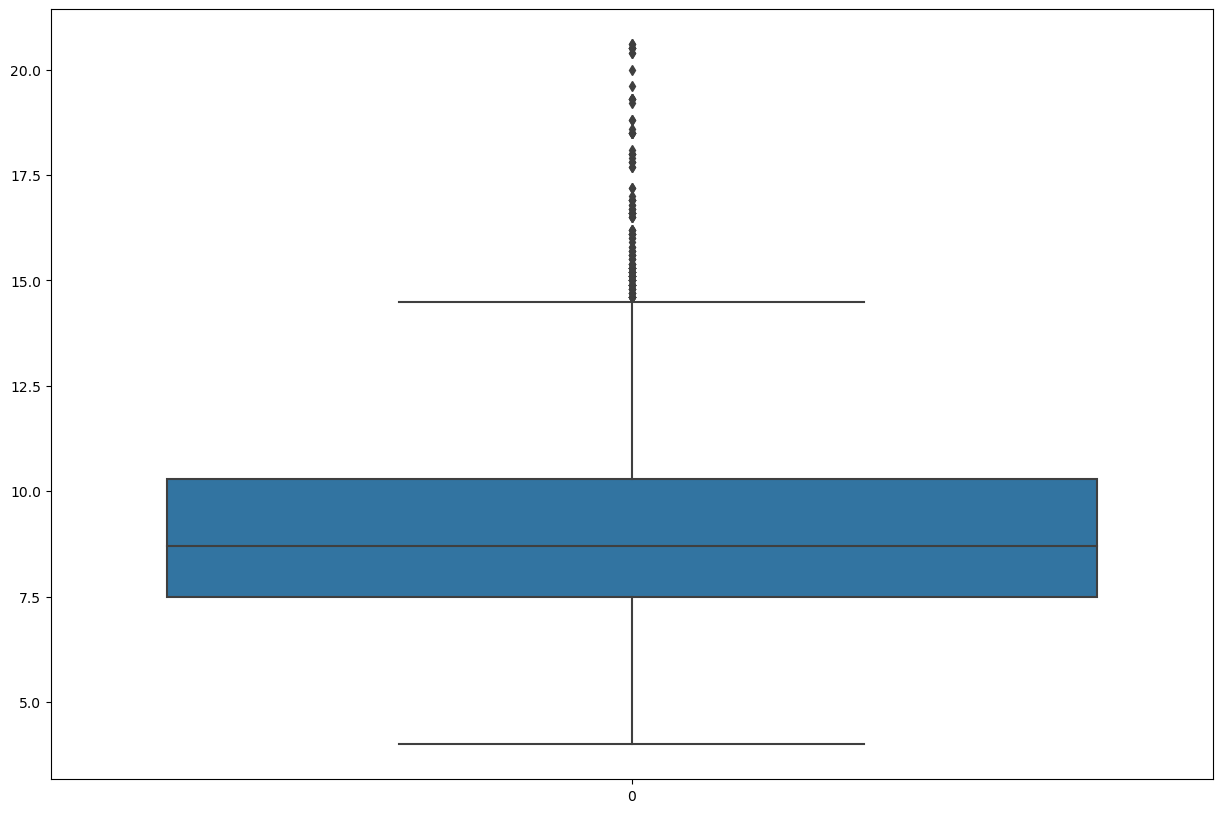

-------------------------------------
Boxplot plot for fuel_consumption_comb(l/100km)
-------------------------------------


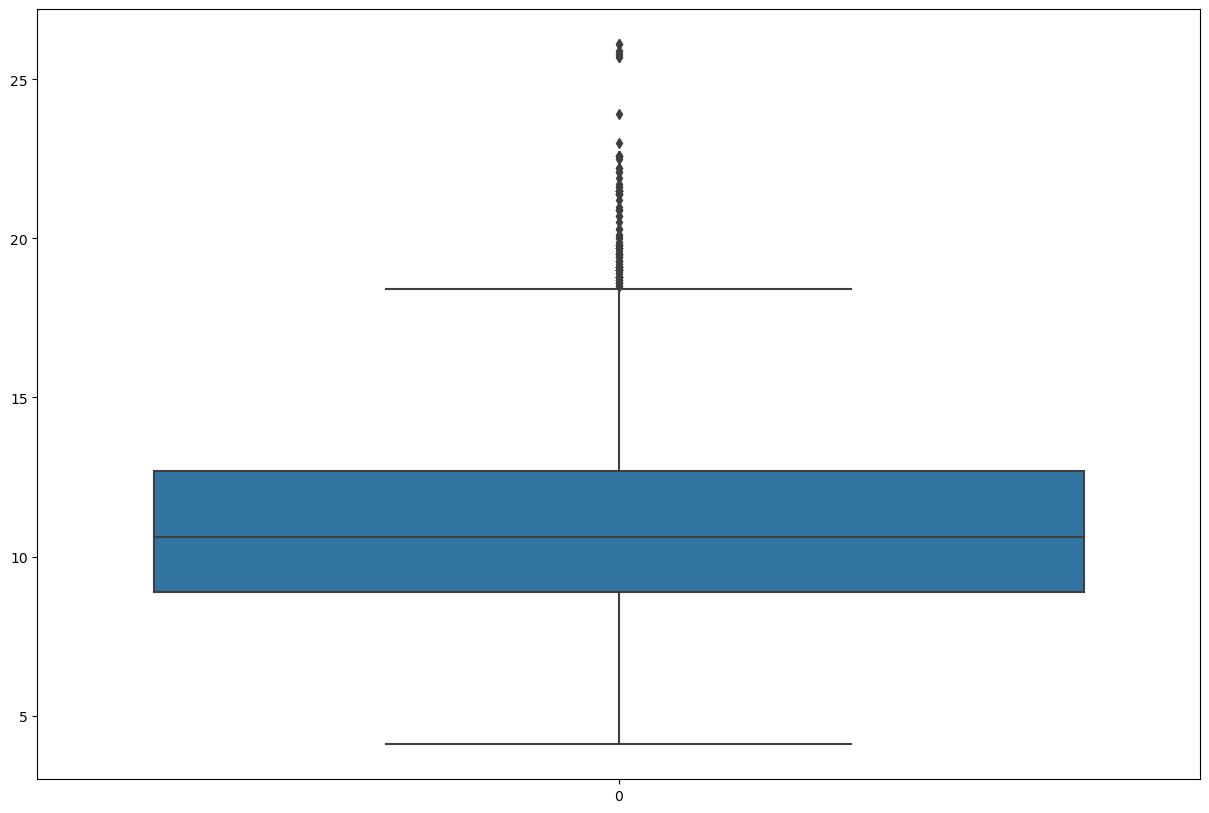

-------------------------------------
Boxplot plot for fuel_consumption_comb(mpg)
-------------------------------------


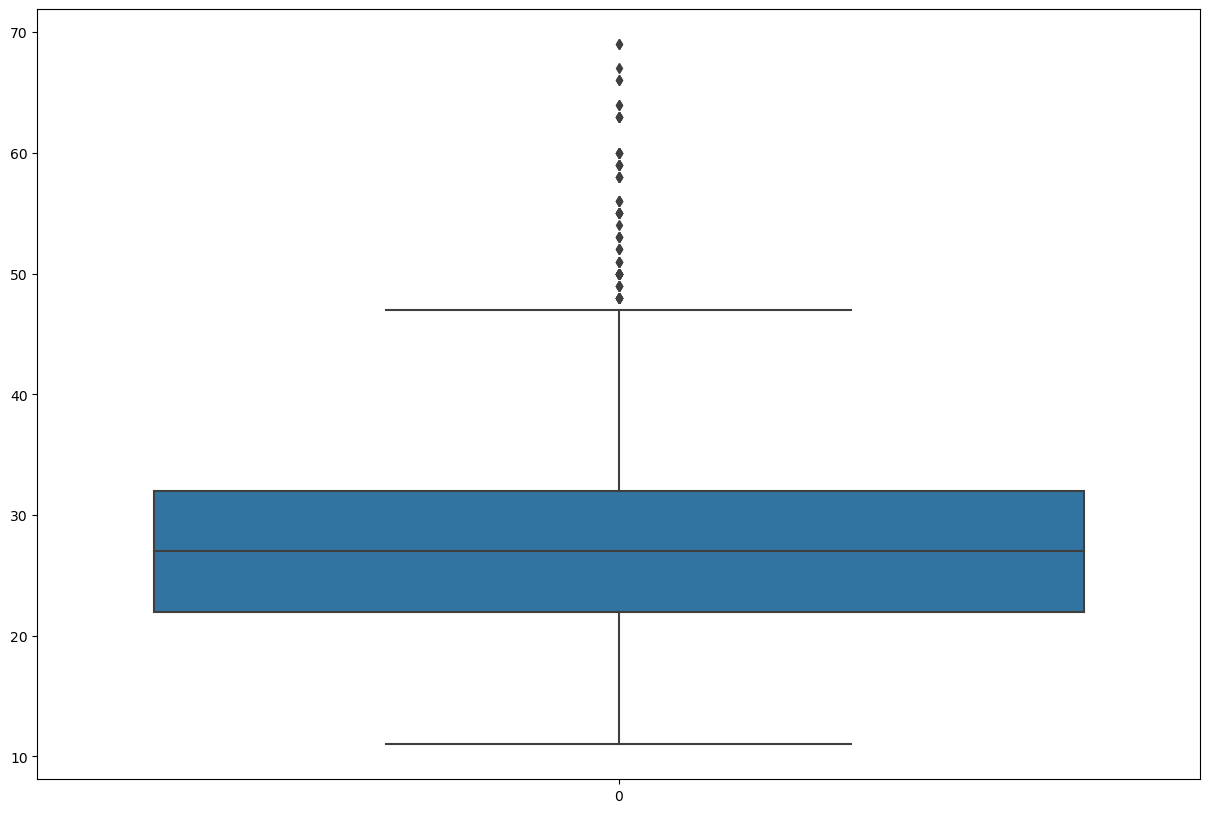

-------------------------------------
Boxplot plot for co2_emissions
-------------------------------------


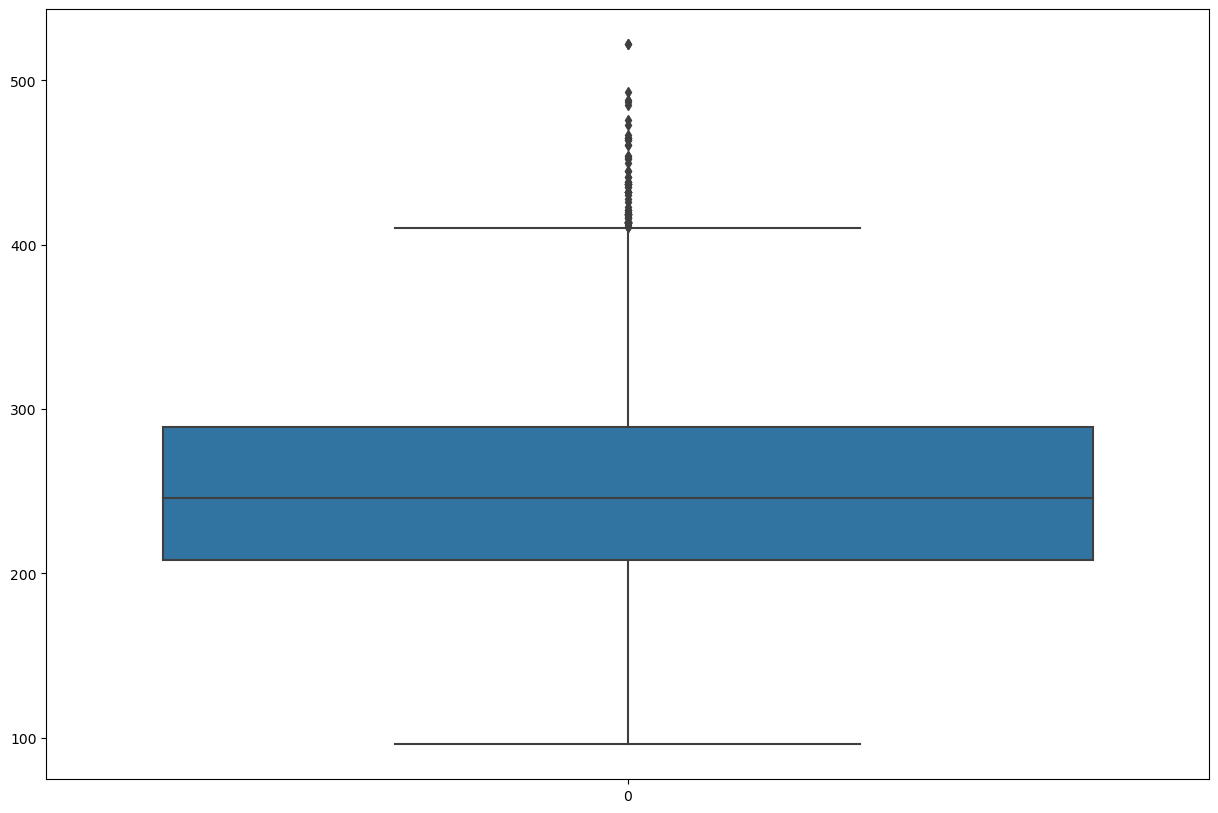

In [59]:
for i in df.columns:
  if  df[i].dtype =='float64' or df[i].dtype =='int64':
    print("-------------------------------------")
    print("Boxplot plot for",i)
    print("-------------------------------------")
    sns.boxplot(df[i])
    plt.show()

In [60]:
for i in df.columns:
  if  df[i].dtype =='object':
    print("----------------------")
    print("Value counts for ",i)
    print("----------------------")

    print(df[i].value_counts())


----------------------
Value counts for  make
----------------------
FORD             575
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           274
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            159
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: make, dtype: int64
----------------------
V

1. Correlation plot
2. count plots for object type
3. swarm plot/violin plots
4. emission plots by object cols

# Removing the outliers

In [61]:
def remove_outliers(df, col, multiplier=1.0):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

-------------------------------------
Distribution plot for engine_size
-------------------------------------


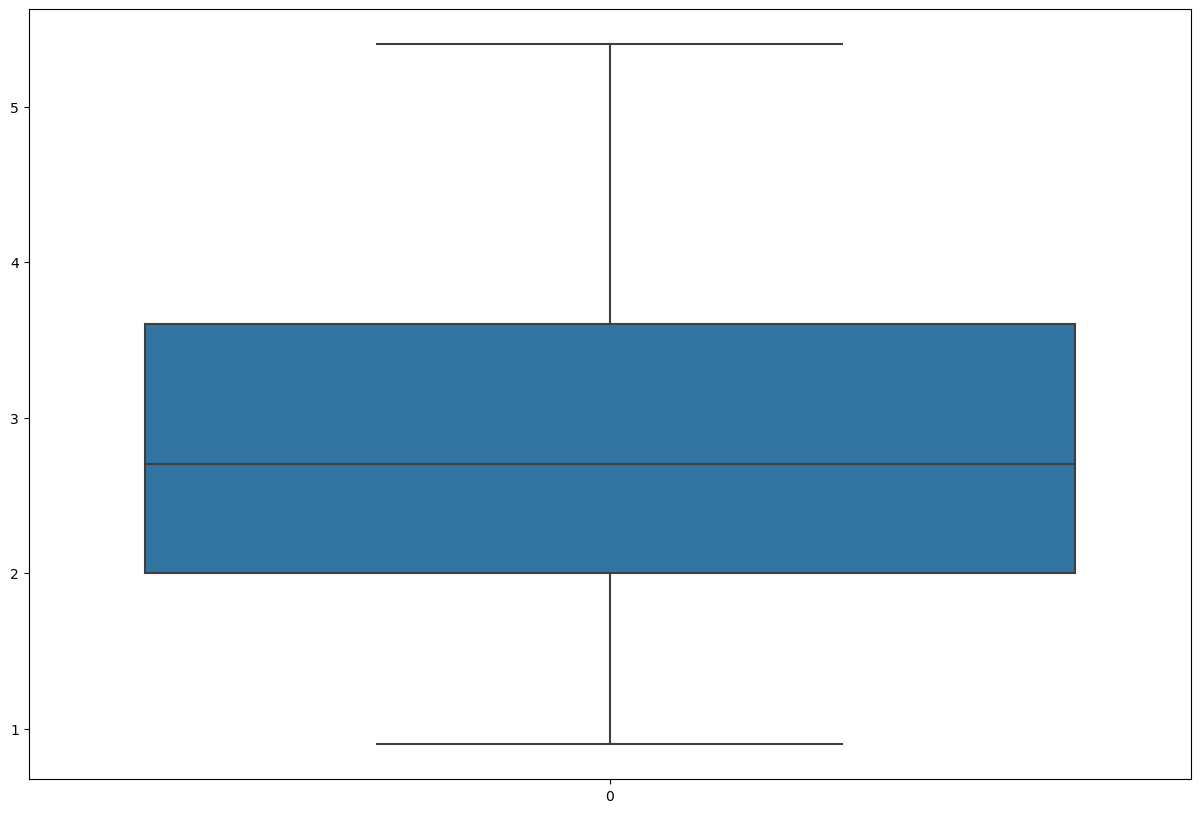

-------------------------------------
Distribution plot for cylinders
-------------------------------------


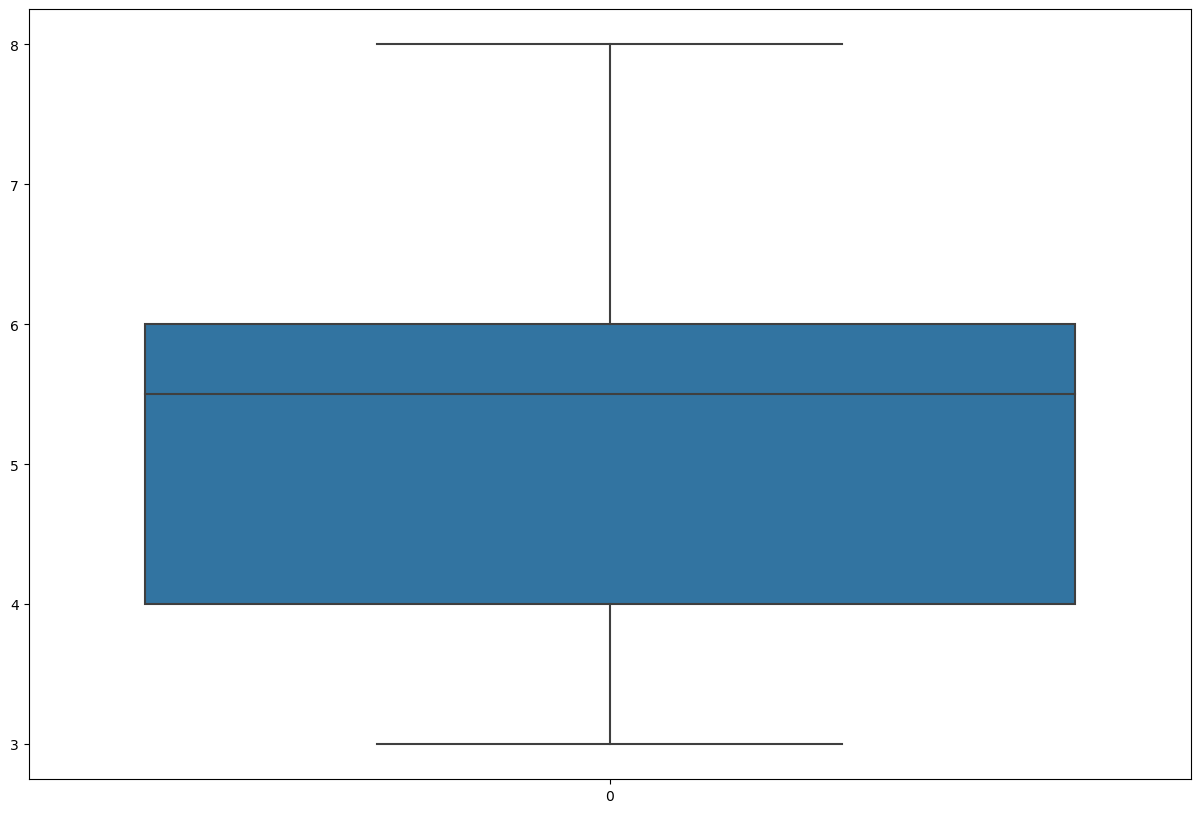

-------------------------------------
Distribution plot for fuel_consumption_city
-------------------------------------


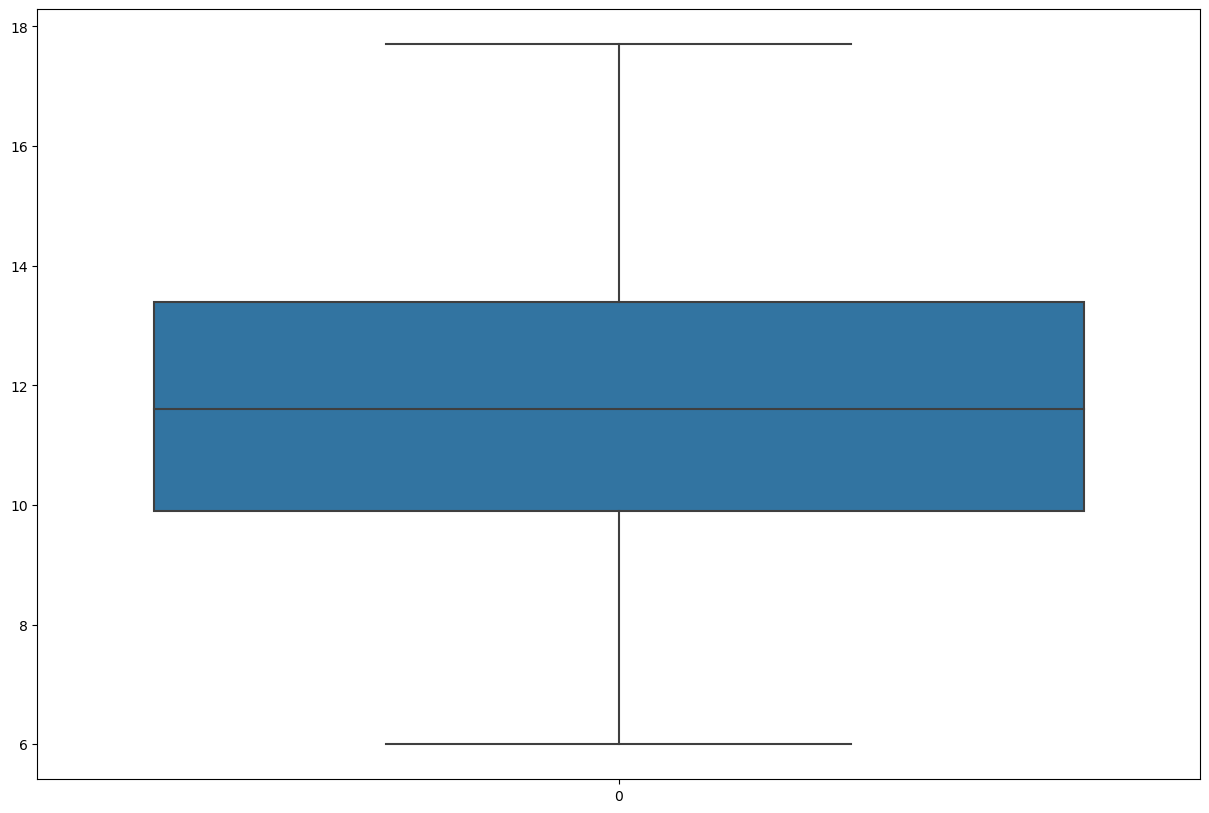

-------------------------------------
Distribution plot for fuel_consumption_hwy
-------------------------------------


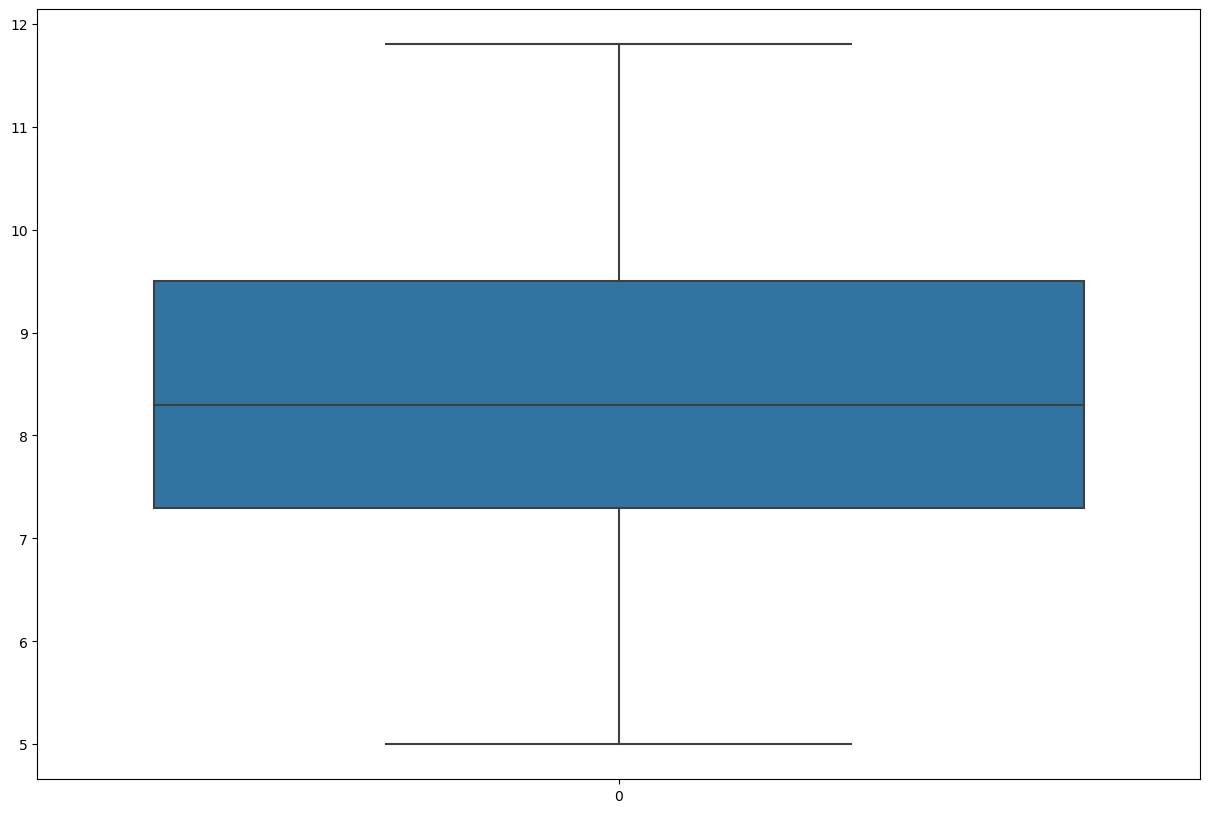

-------------------------------------
Distribution plot for fuel_consumption_comb(l/100km)
-------------------------------------


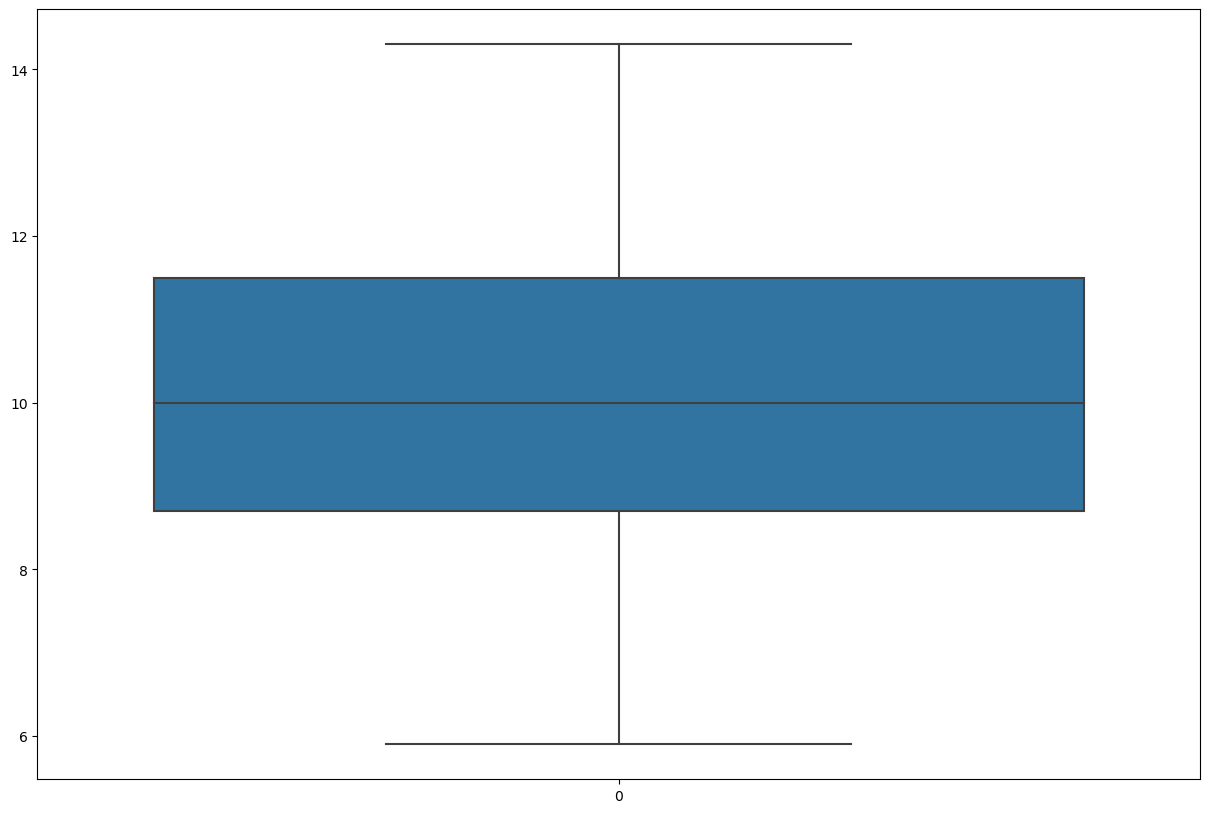

-------------------------------------
Distribution plot for fuel_consumption_comb(mpg)
-------------------------------------


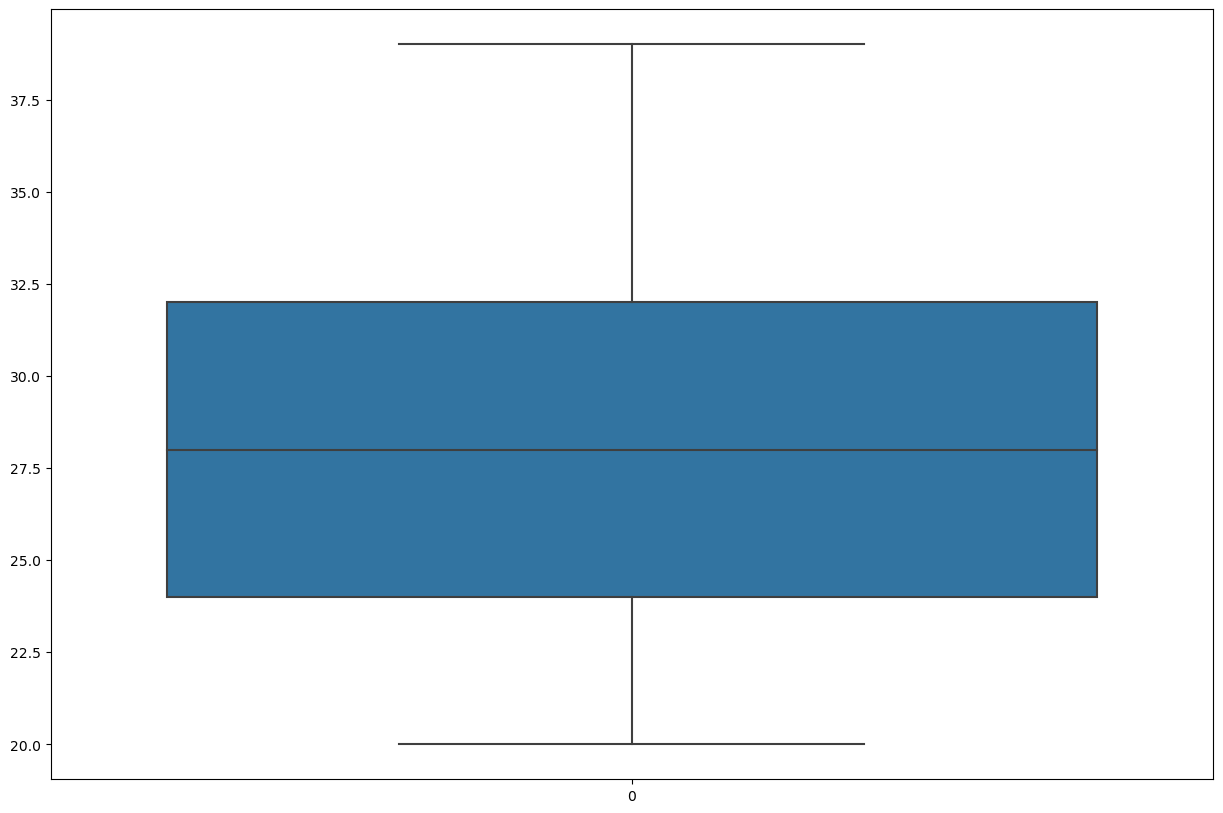

-------------------------------------
Distribution plot for co2_emissions
-------------------------------------


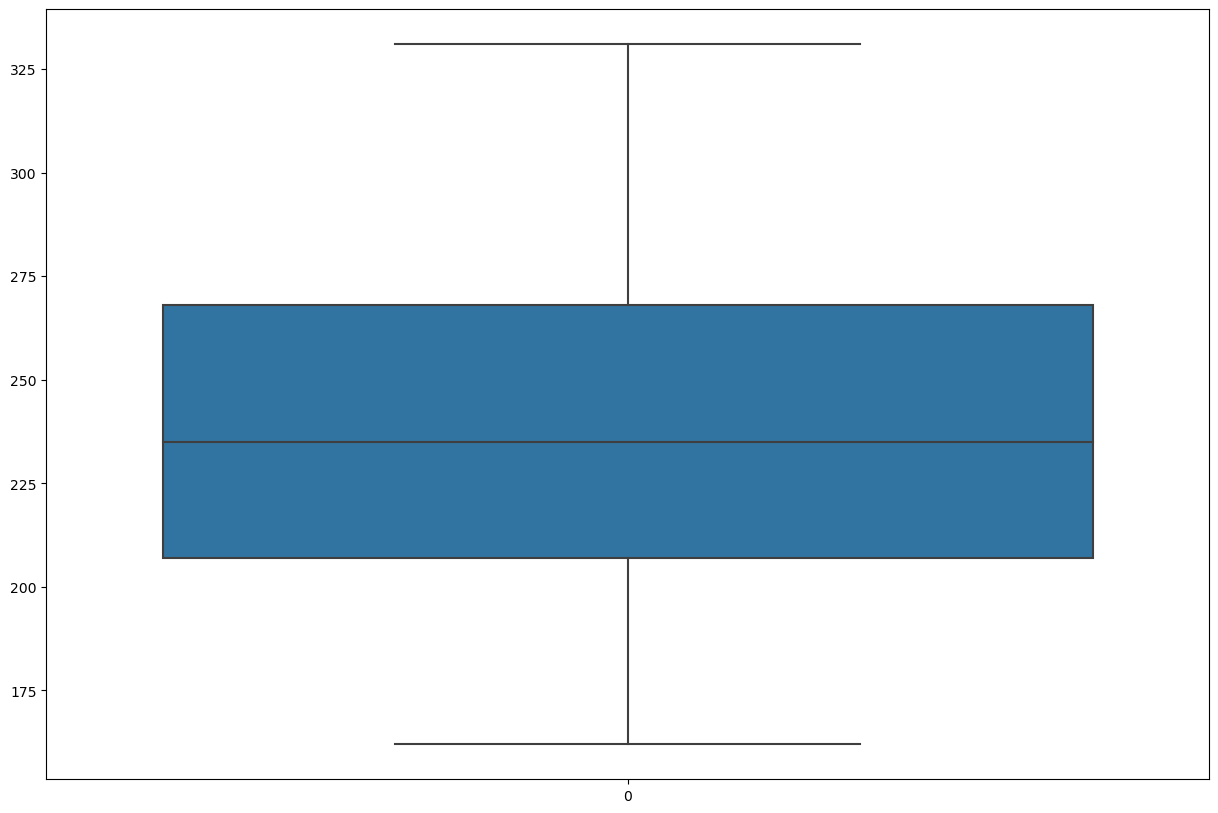

In [62]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        print("-------------------------------------")
        print("Distribution plot for",i)
        print("-------------------------------------")
        df=remove_outliers(df,i)
        sns.boxplot(df[i])
        plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            4917 non-null   object 
 1   model                           4917 non-null   object 
 2   vehicle_class                   4917 non-null   object 
 3   engine_size                     4917 non-null   float64
 4   cylinders                       4917 non-null   int64  
 5   transmission                    4917 non-null   object 
 6   fuel_type                       4917 non-null   object 
 7   fuel_consumption_city           4917 non-null   float64
 8   fuel_consumption_hwy            4917 non-null   float64
 9   fuel_consumption_comb(l/100km)  4917 non-null   float64
 10  fuel_consumption_comb(mpg)      4917 non-null   int64  
 11  co2_emissions                   4917 non-null   int64  
dtypes: float64(4), int64(3), object(5)

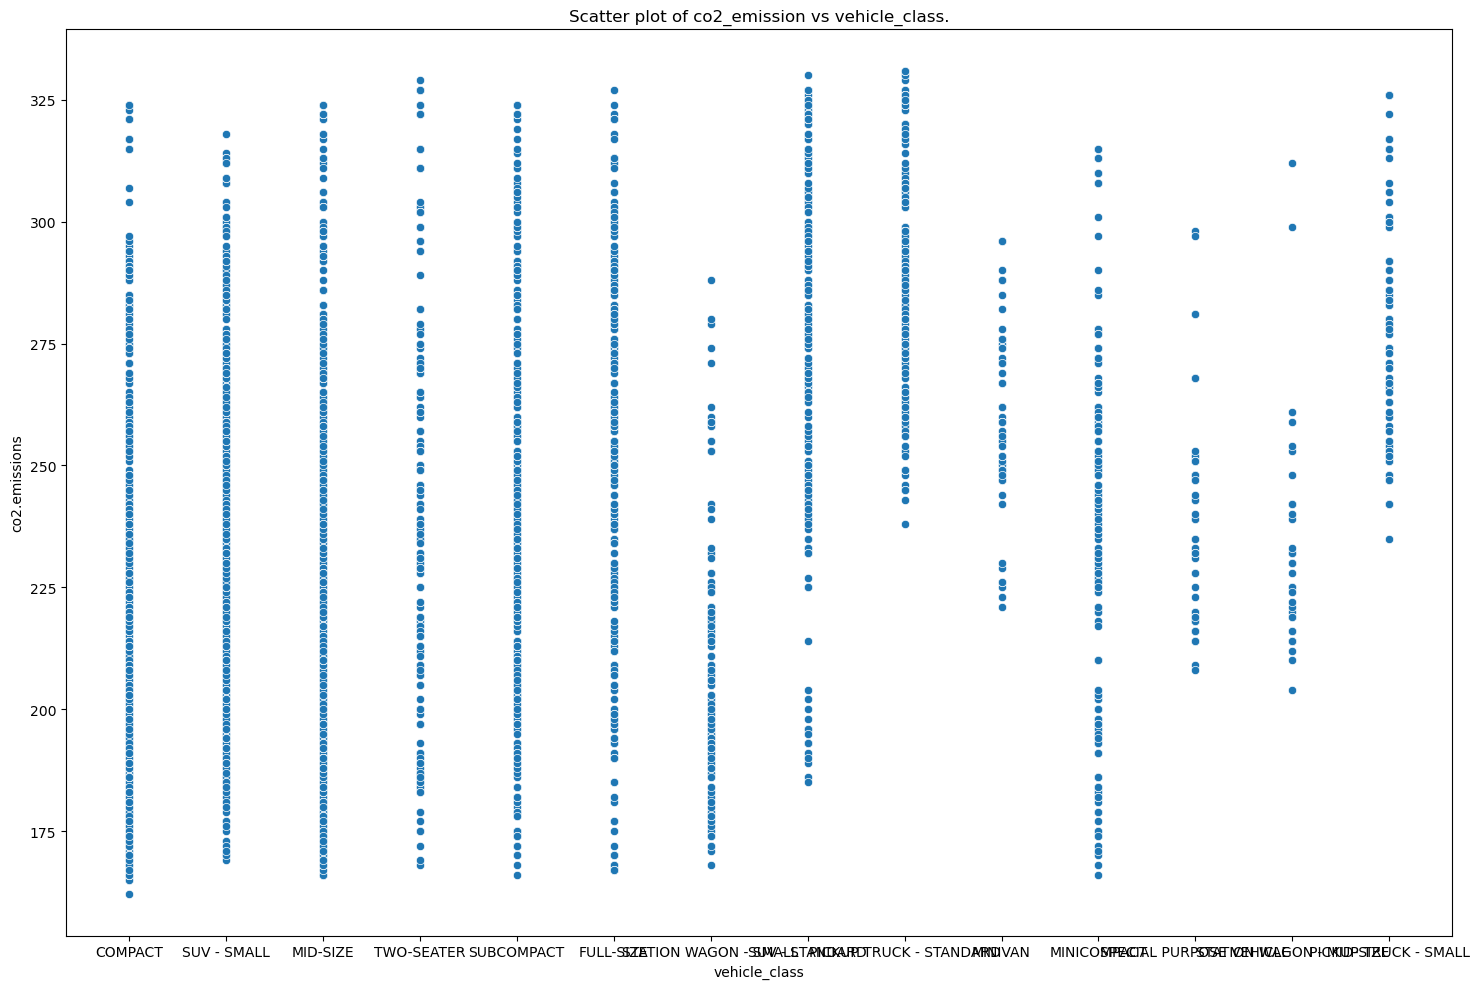

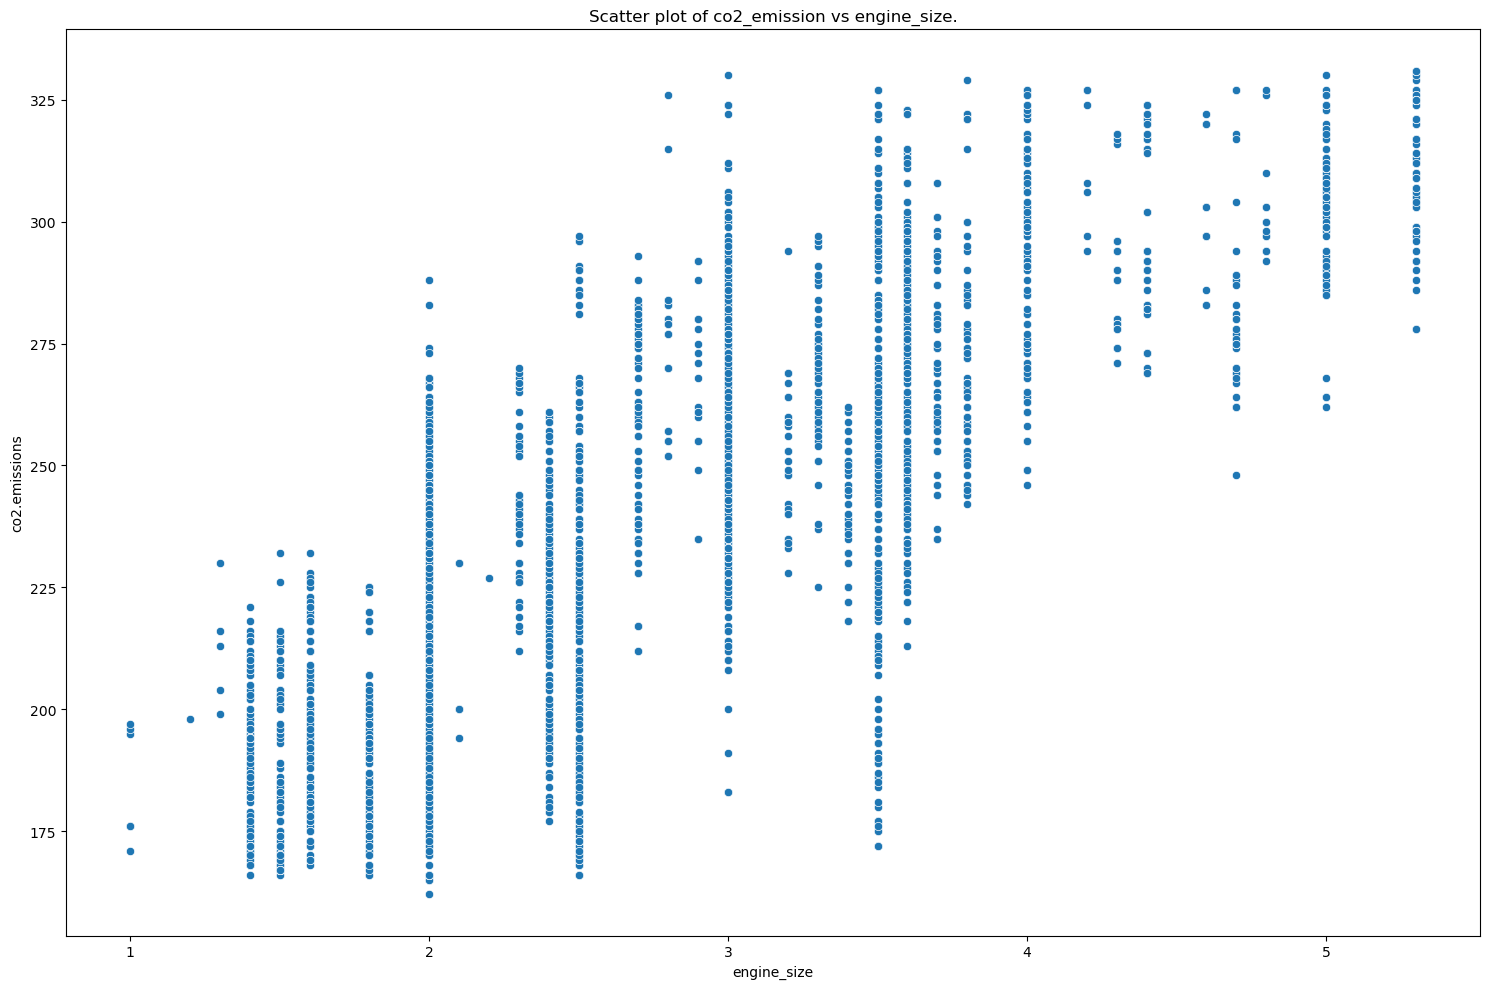

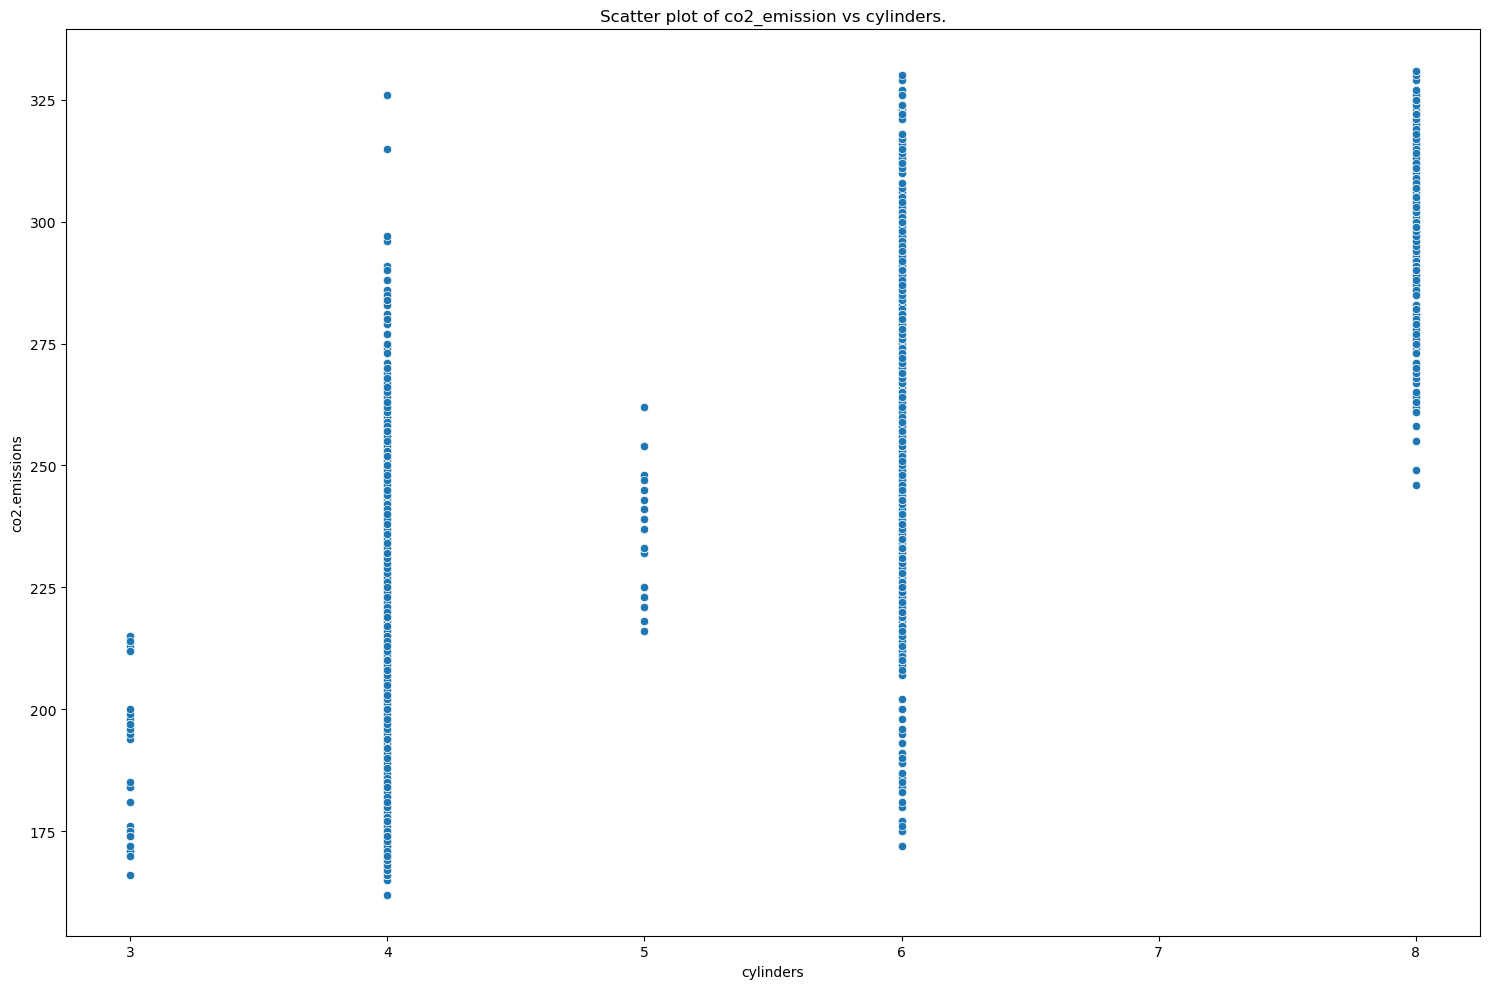

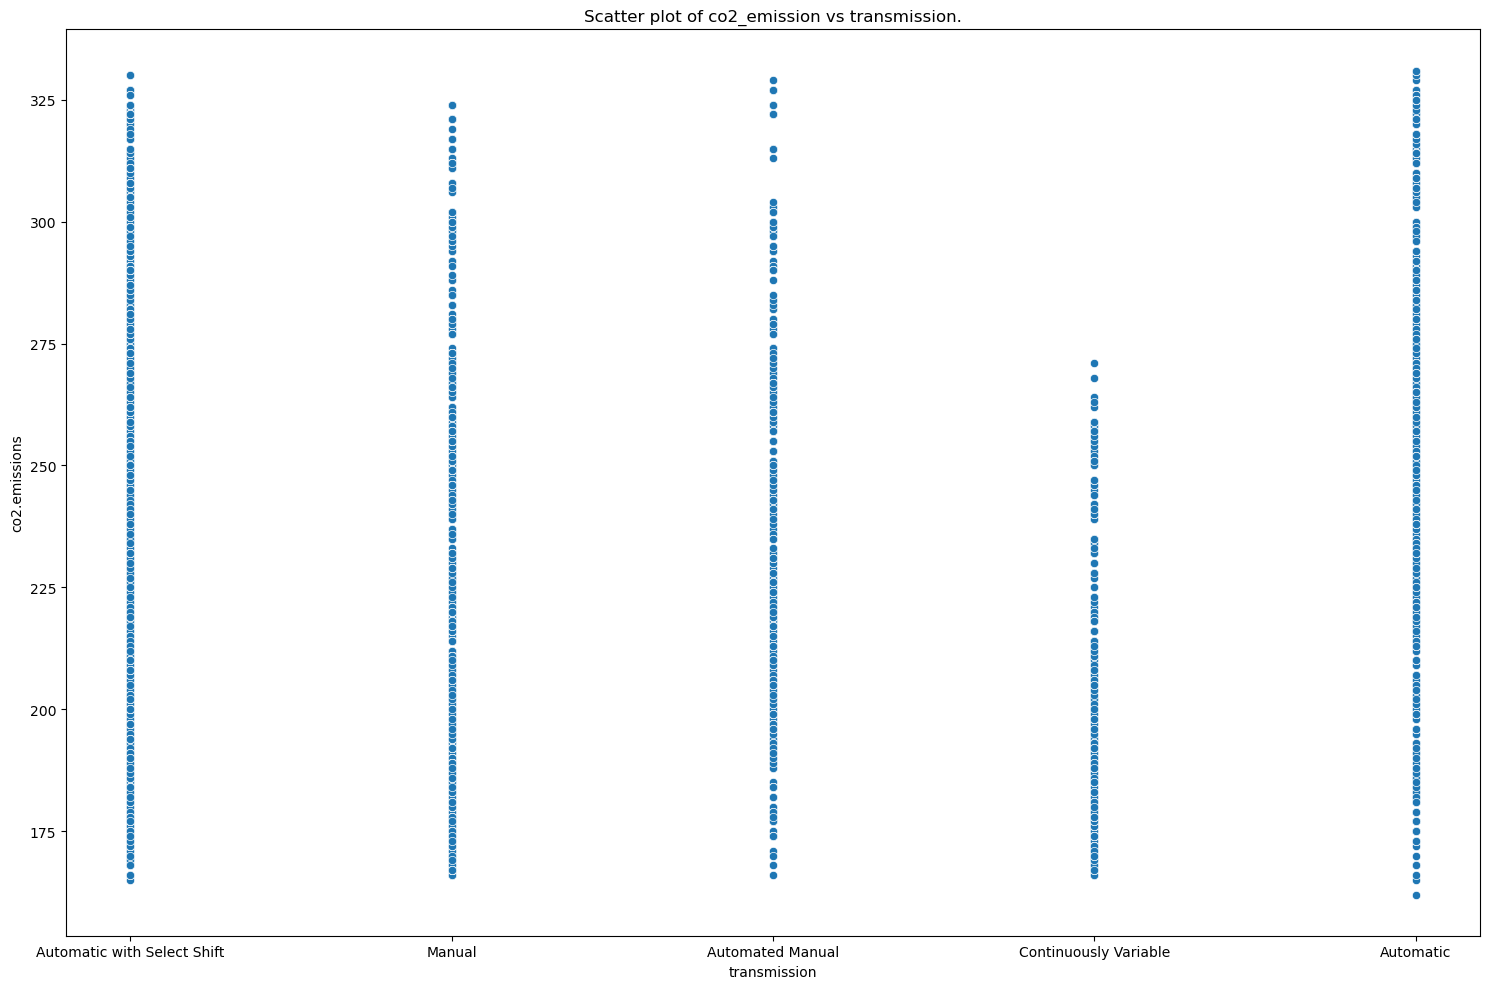

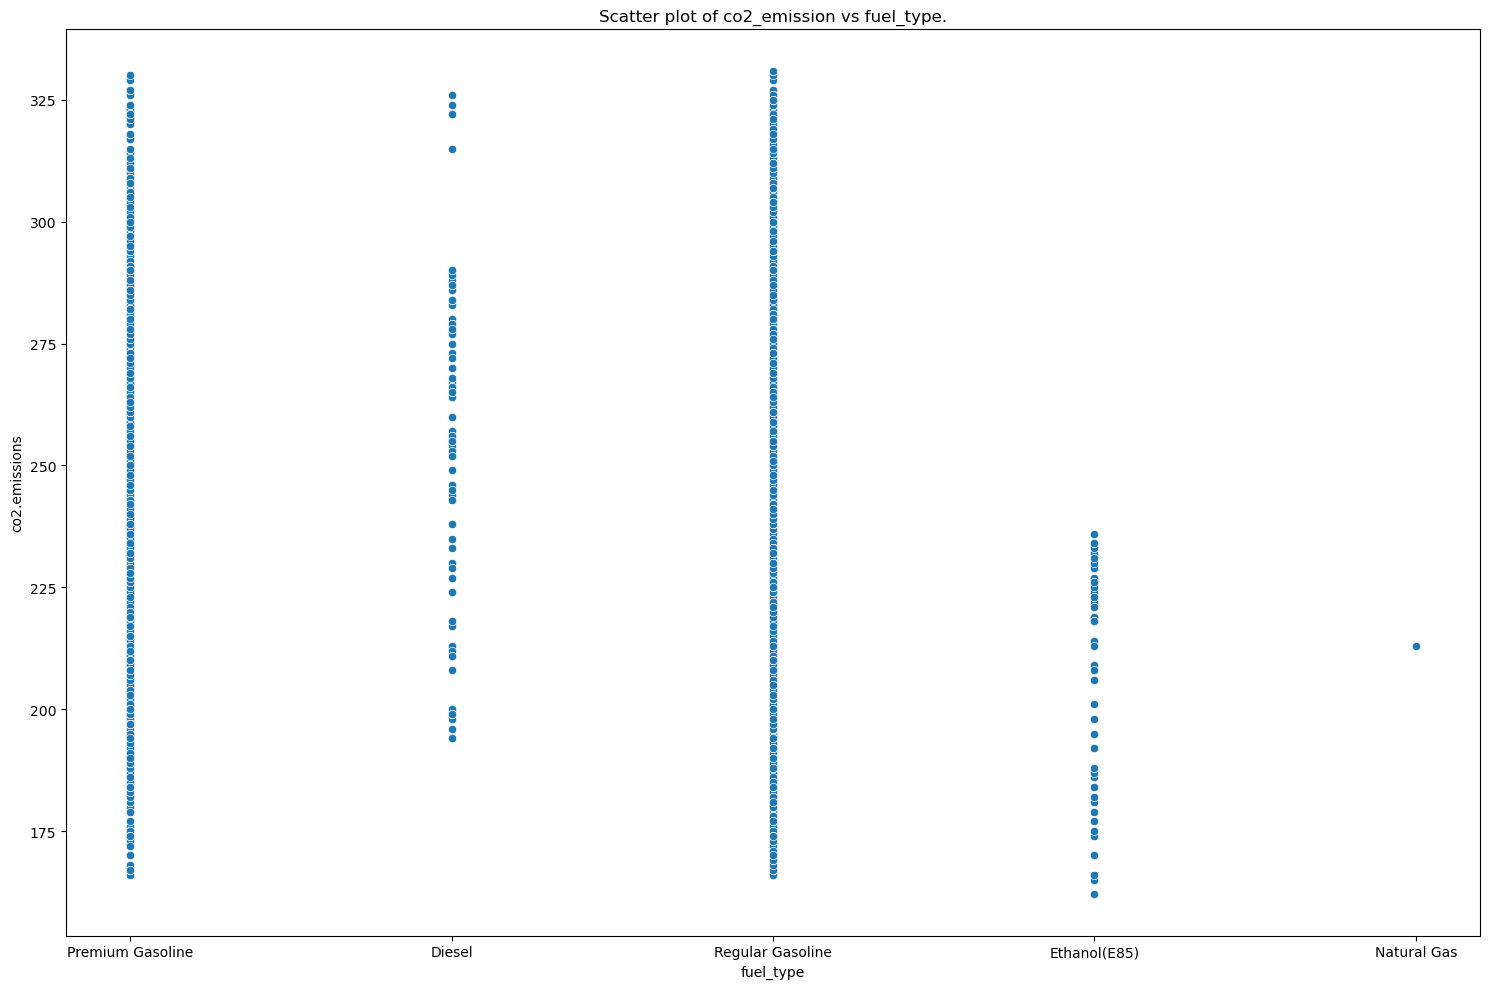

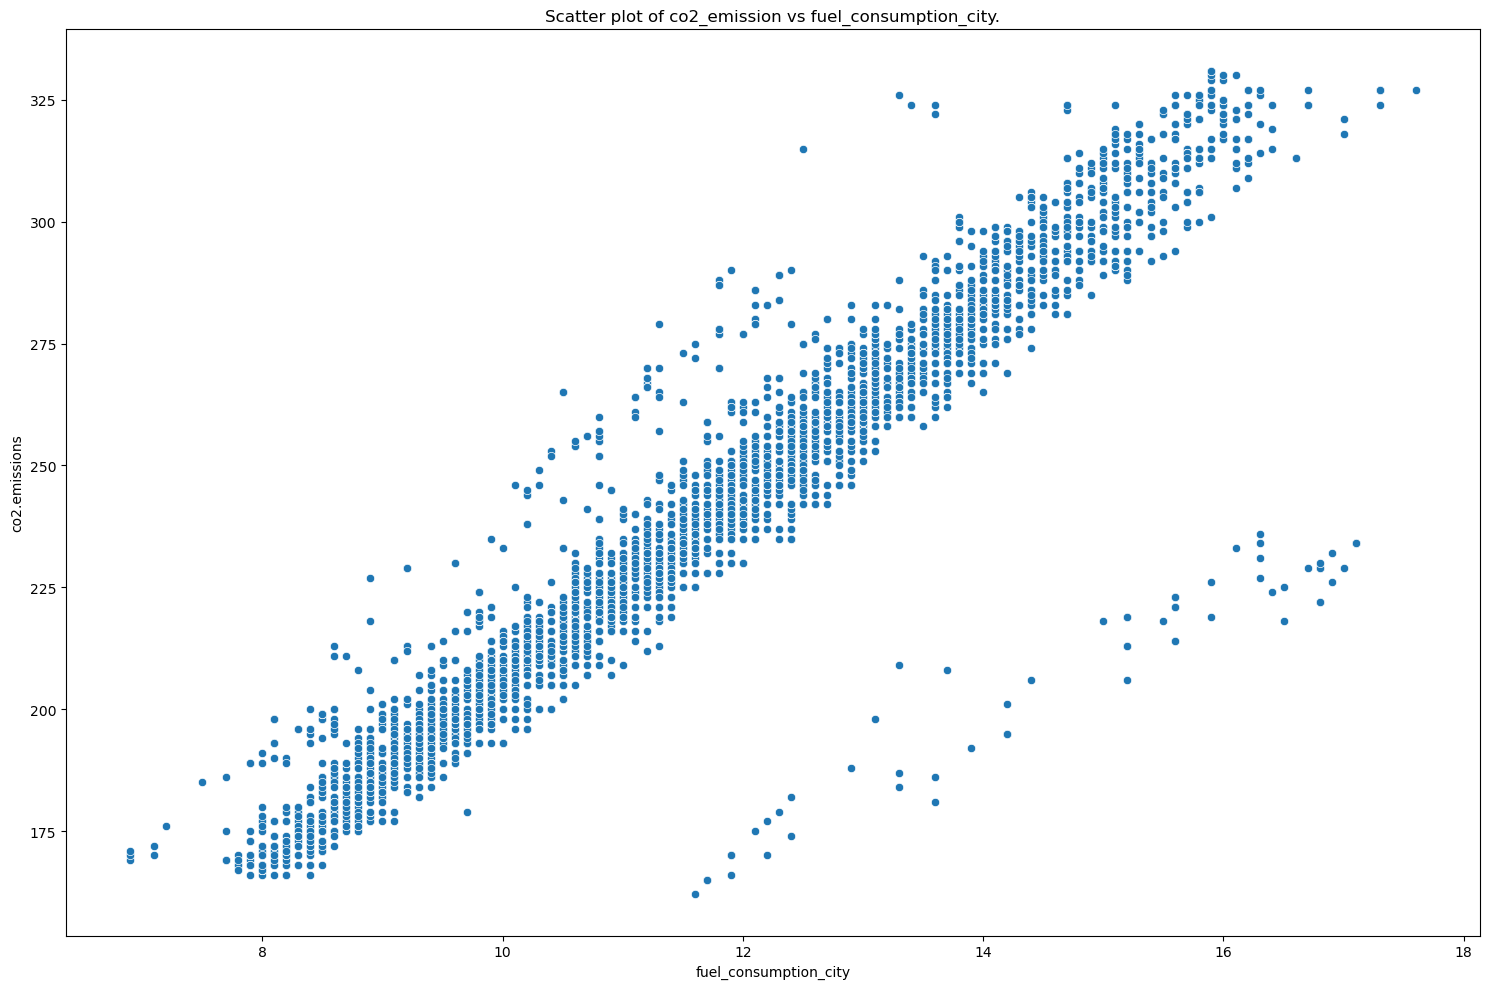

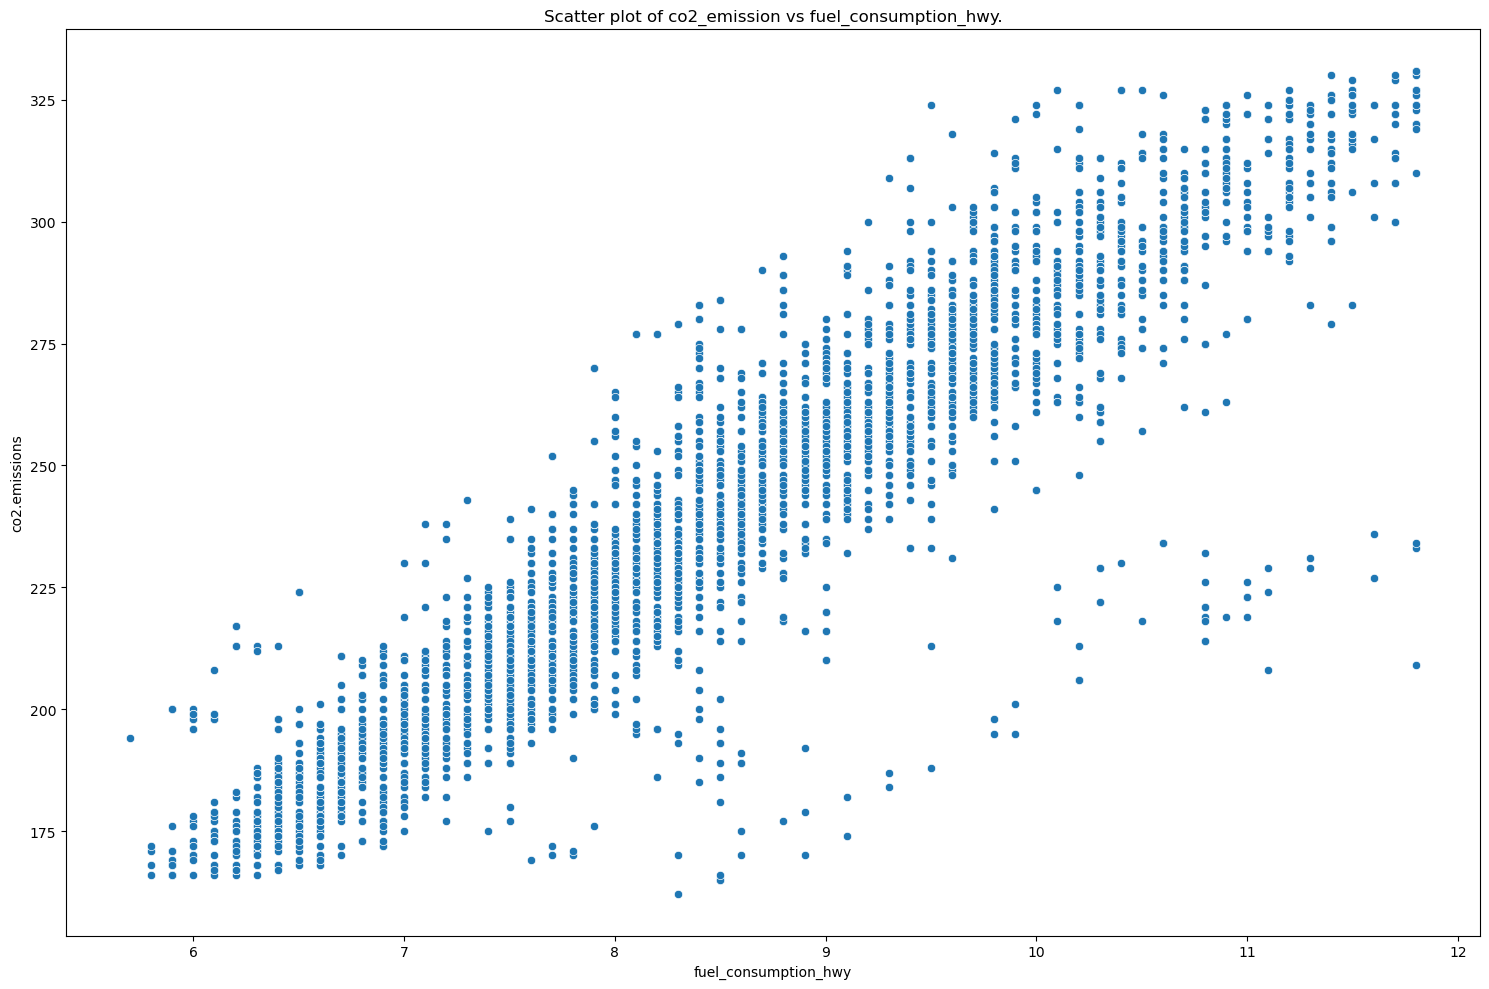

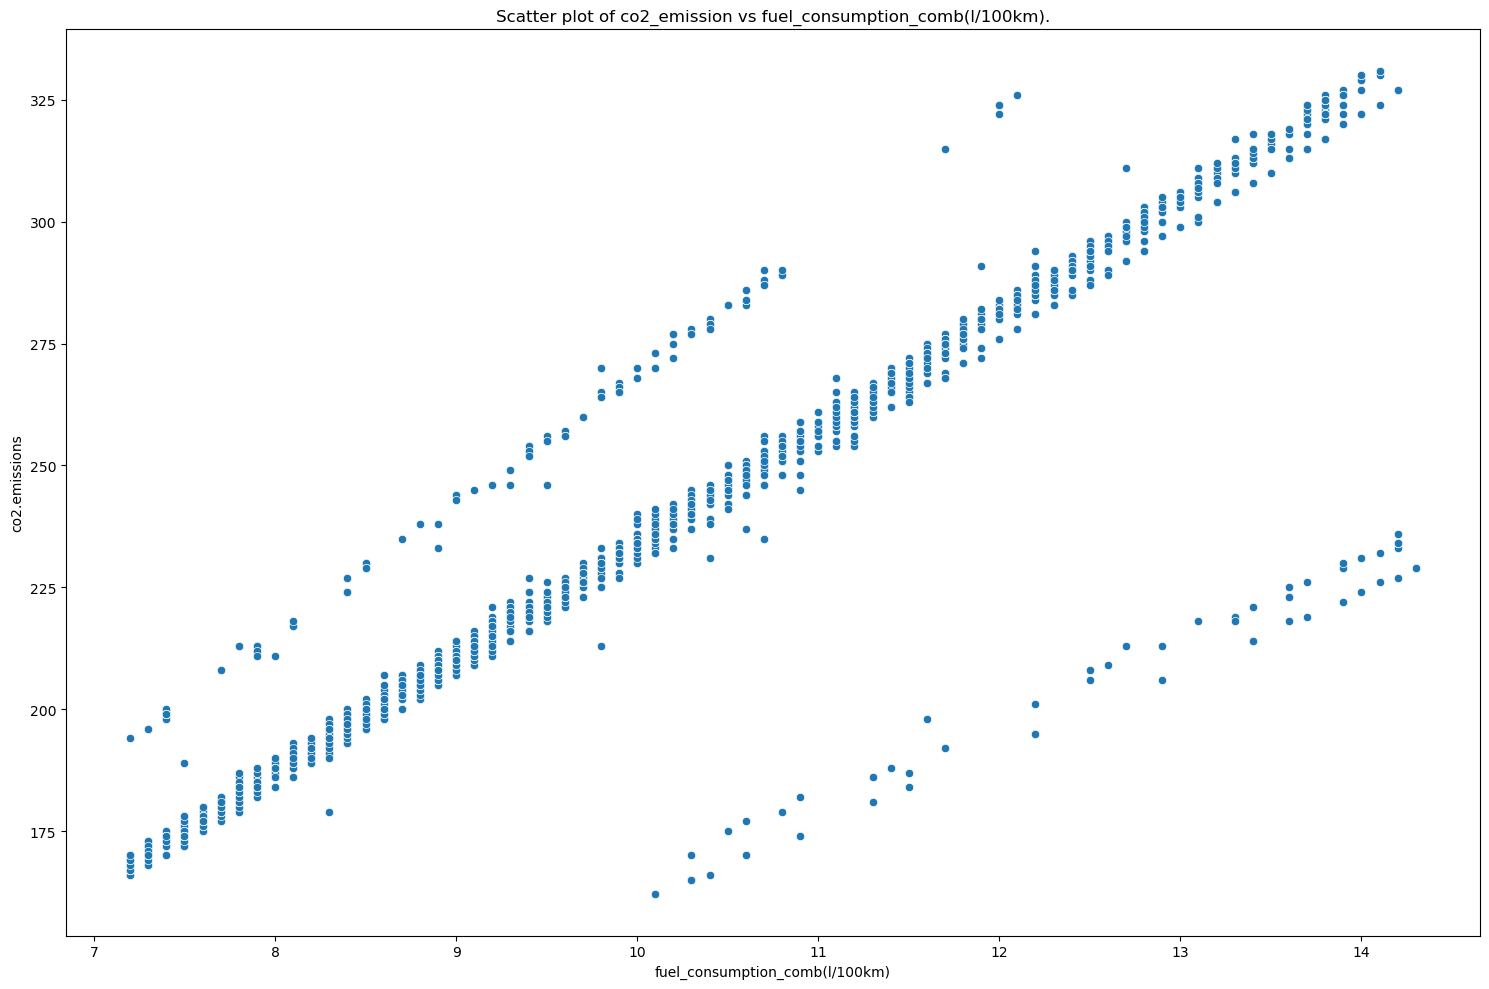

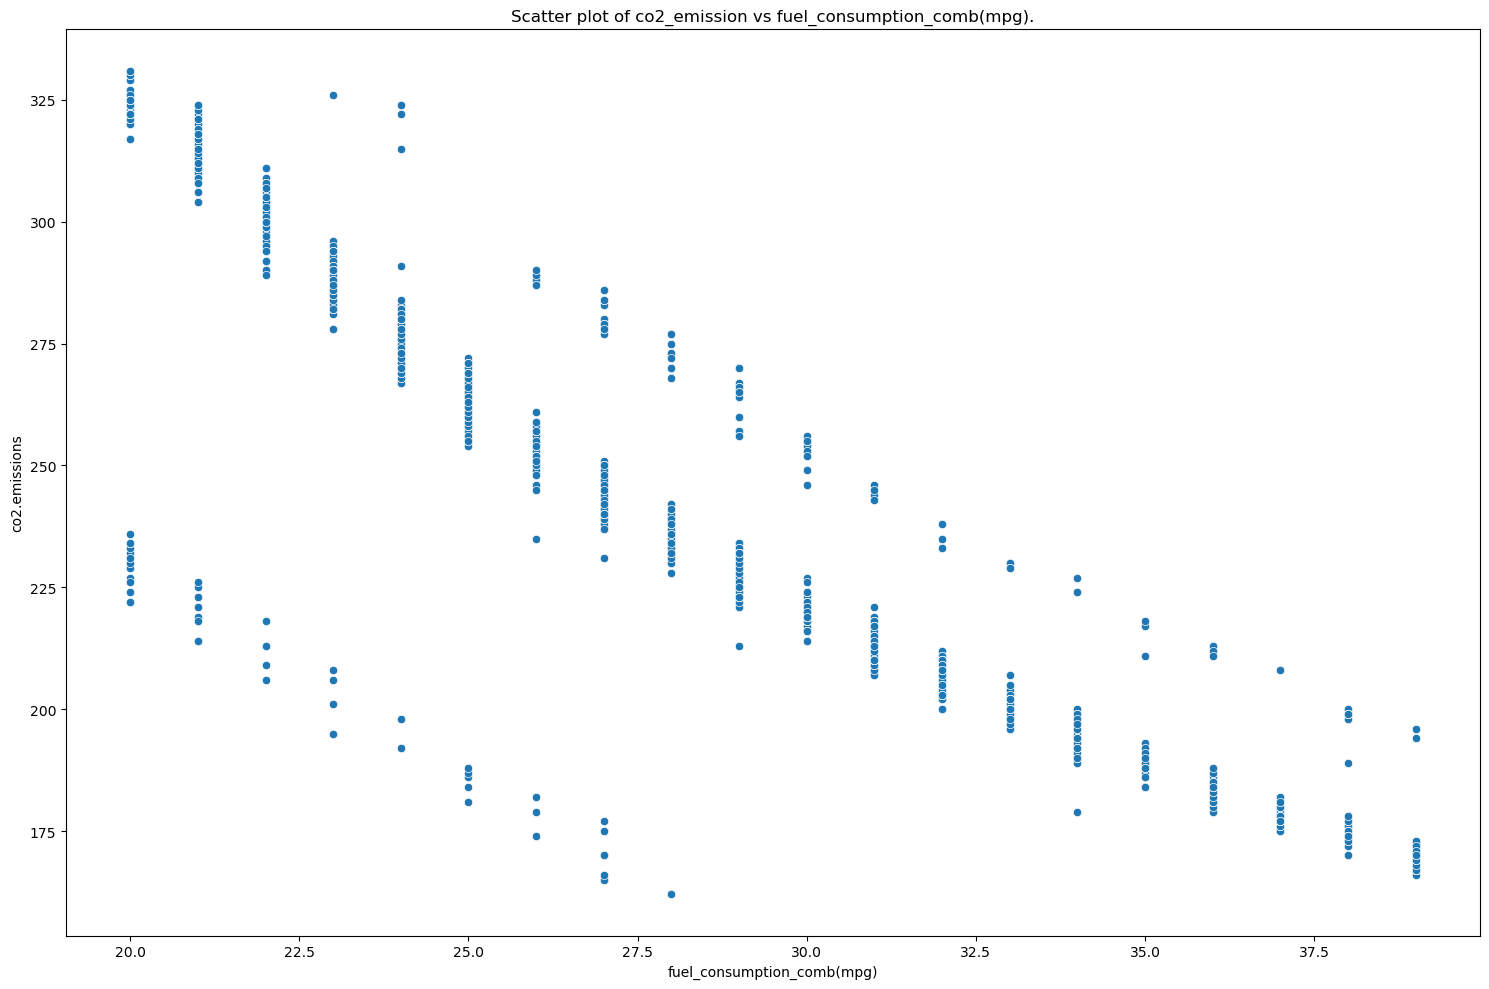

In [64]:
for col in df.columns[2:-1]:
    sns.scatterplot(x=col, y='co2_emissions', data=df)
    plt.xlabel(col)
    plt.ylabel('co2.emissions')
    plt.title(f'Scatter plot of co2_emission vs {col}.')
    plt.tight_layout()
    plt.show()

Make
-------------  ---
BMW            458
FORD           422
CHEVROLET      323
PORSCHE        283
MERCEDES-BENZ  261
AUDI           237
MINI           199
JEEP           186
NISSAN         182
TOYOTA         174
VOLKSWAGEN     171
KIA            170
GMC            169
HYUNDAI        162
HONDA          120
CADILLAC       119
SUBARU         119
VOLVO          118
MAZDA          117
JAGUAR         113
LEXUS          111
BUICK           86
DODGE           83
INFINITI        74
LINCOLN         68
MITSUBISHI      59
FIAT            53
LAND ROVER      50
ACURA           49
CHRYSLER        49
RAM             37
MASERATI        34
SCION           19
ALFA ROMEO      19
GENESIS         13
BENTLEY          7
ASTON MARTIN     3
-------------  ---


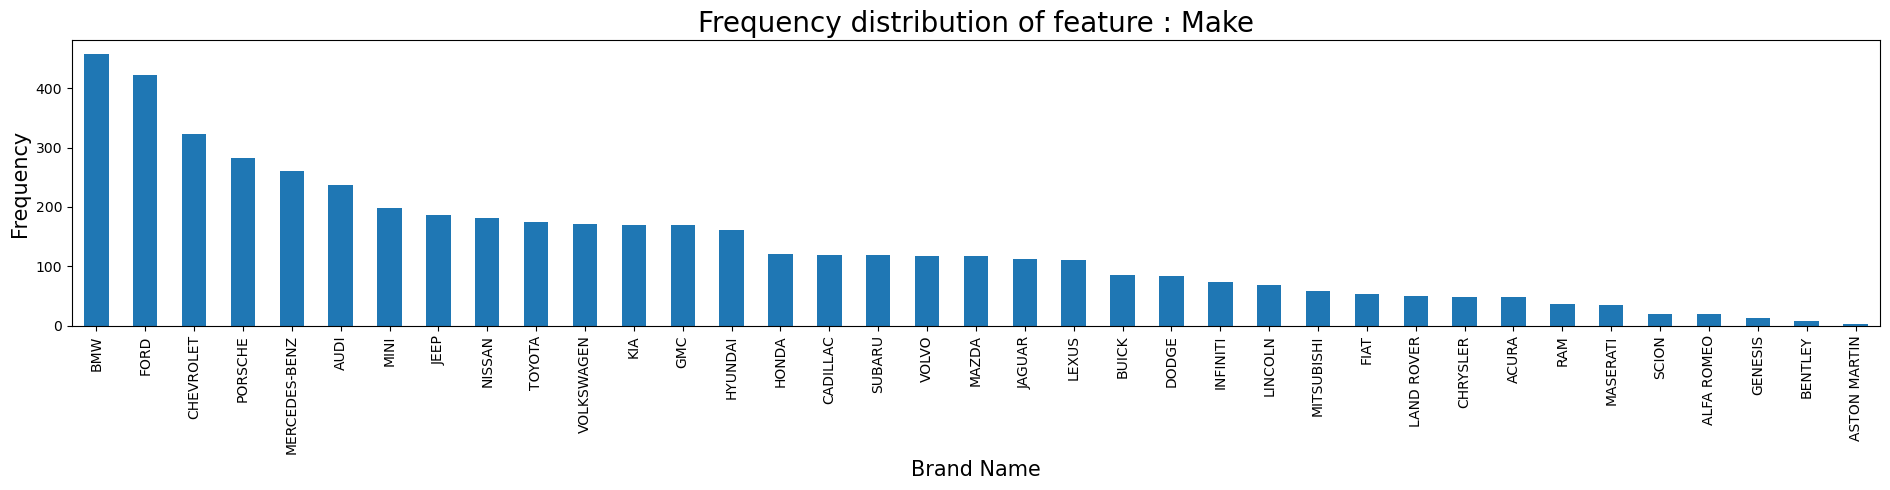

In [65]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(df.make.value_counts())))
plt.figure(figsize=(19,5));
df.groupby("make")["make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

model
-----------------------------------------  --
MUSTANG                                    25
FOCUS FFV                                  24
F-150 4X4                                  19
F-150                                      18
COMPASS                                    18
SONIC 5                                    18
JETTA                                      18
ATS                                        18
SONIC                                      17
PATRIOT                                    16
ACCORD                                     16
FUSION                                     15
CAMARO                                     15
TACOMA 4WD                                 15
FORTE 5                                    15
PASSAT                                     15
FORTE KOUP                                 15
COLORADO                                   14
BEETLE                                     14
F-150 FFV                                  14
F-150 FFV 4X4               

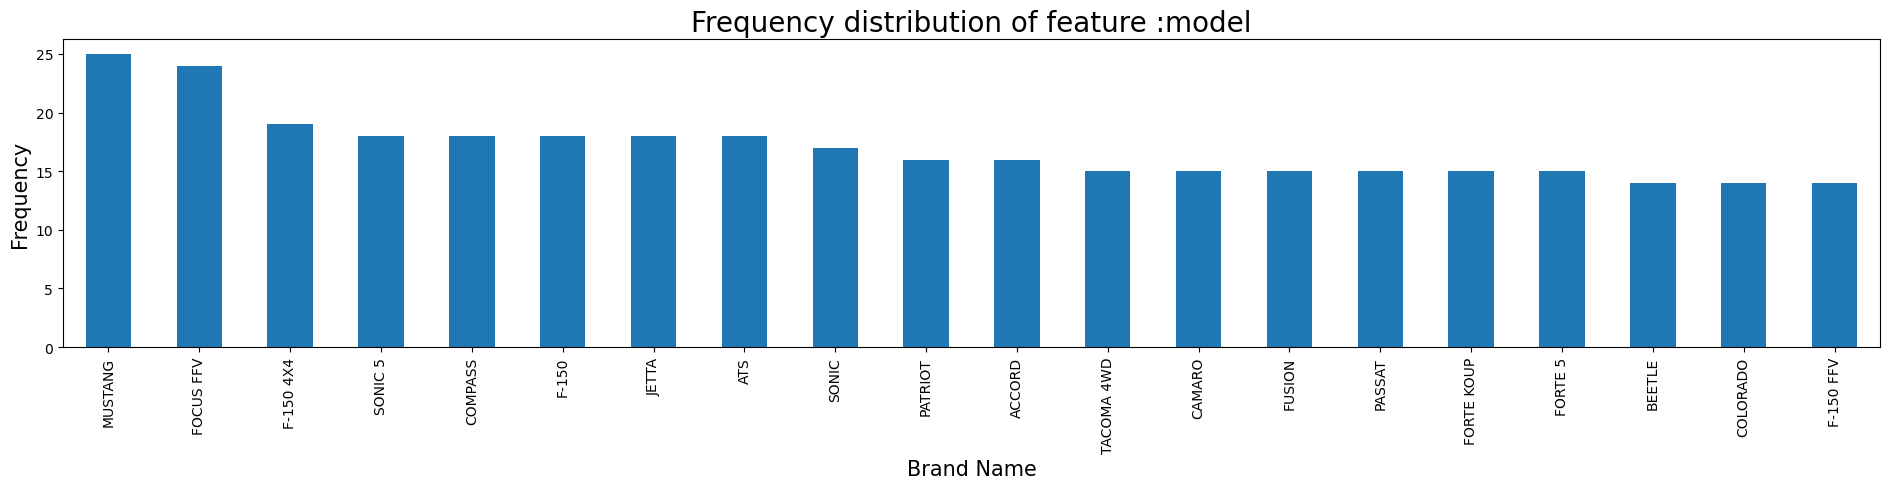

In [66]:

print("model")
print(tabulate(pd.DataFrame(df.model.value_counts())))
plt.figure(figsize=(19,5));
df.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature :model", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

vehicle_class
------------------------  ---
SUV - SMALL               980
MID-SIZE                  781
COMPACT                   752
SUBCOMPACT                467
FULL-SIZE                 376
SUV - STANDARD            345
MINICOMPACT               258
PICKUP TRUCK - STANDARD   256
TWO-SEATER                239
STATION WAGON - SMALL     187
PICKUP TRUCK - SMALL      130
SPECIAL PURPOSE VEHICLE    59
MINIVAN                    53
STATION WAGON - MID-SIZE   34
------------------------  ---


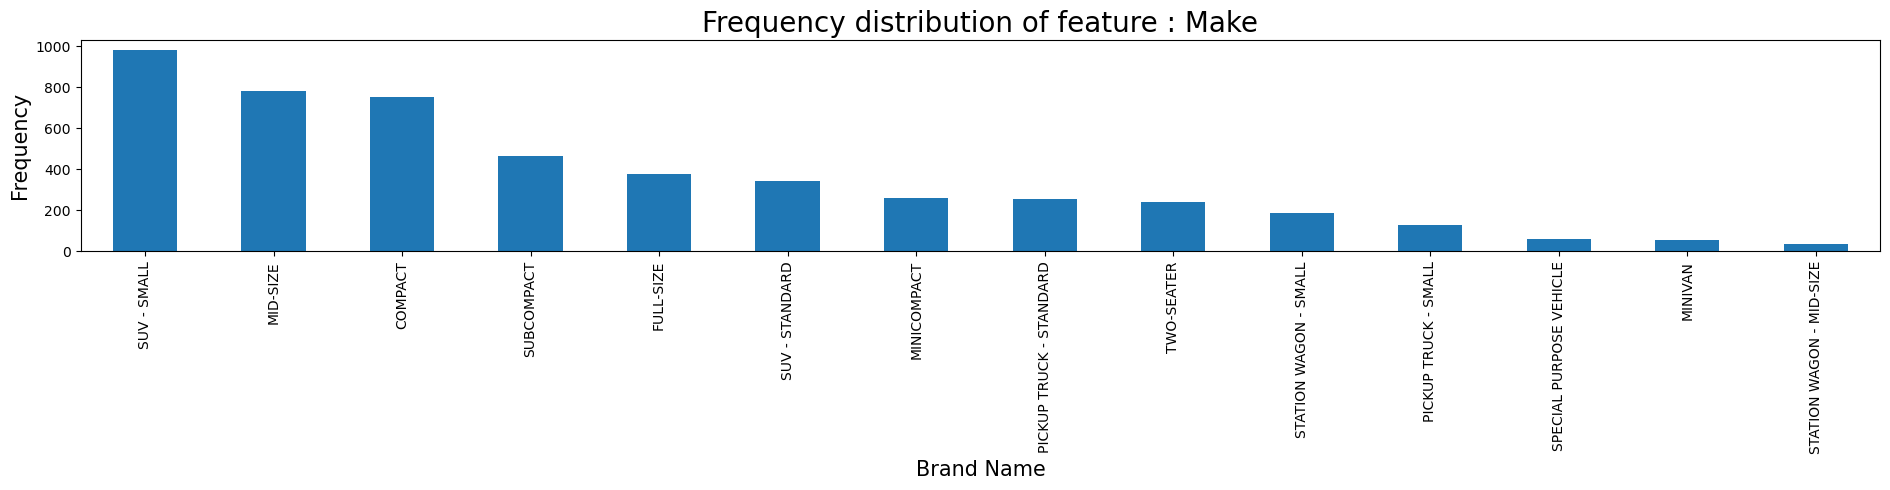

In [67]:
print("vehicle_class")
print(tabulate(pd.DataFrame(df.vehicle_class.value_counts())))
plt.figure(figsize=(19,5));
df.groupby("vehicle_class")["vehicle_class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [68]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,Automatic with Select Shift,Premium Gasoline,11.9,7.7,10.0,28,230


[]

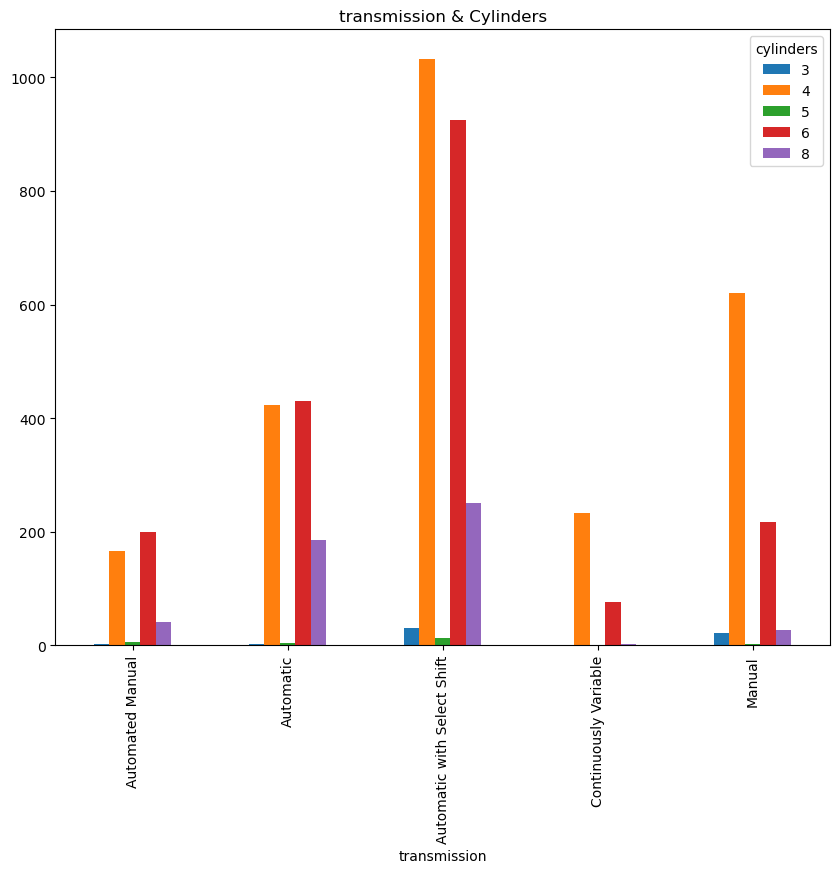

In [69]:
pd.crosstab(df['transmission'], df['cylinders']).plot(kind="bar",figsize=(10, 8), title="transmission & Cylinders");
plt.plot()

[]

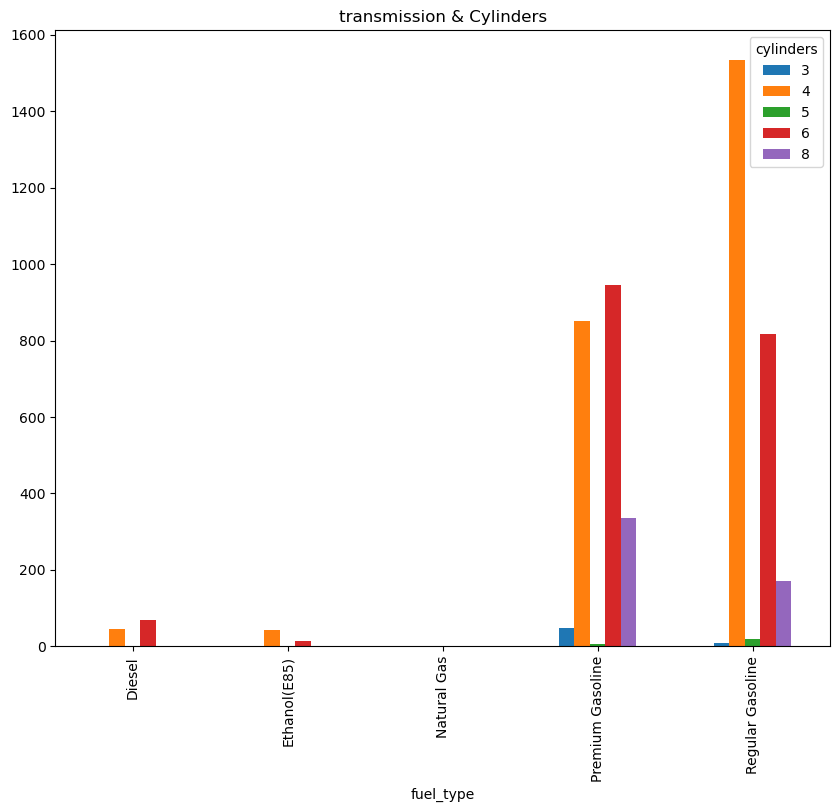

In [70]:
pd.crosstab(df['fuel_type'], df['cylinders']).plot(kind="bar",figsize=(10, 8), title="transmission & Cylinders");
plt.plot()

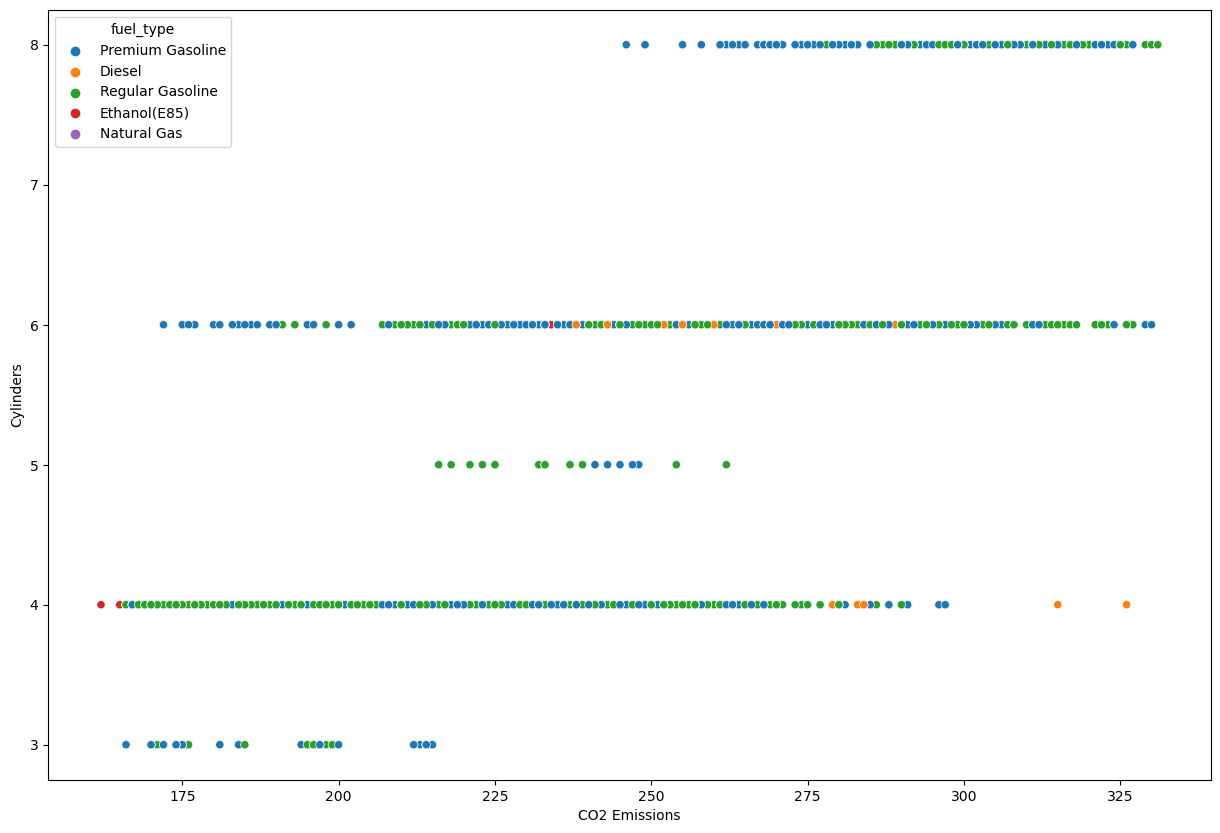

In [71]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot(x='co2_emissions',y='cylinders',data = df,hue='fuel_type')
plt.xlabel("CO2 Emissions", fontsize=10)
plt.ylabel("Cylinders", fontsize=10)
plt.show()

# Feature selection


In [72]:
df['Make_Type'] = df['make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [73]:
df['Vehicle_Class_Type'] = df['vehicle_class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [74]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221,Luxury,Hatchback
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255,Luxury,SUV
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244,Luxury,SUV
5,ACURA,RLX,MID-SIZE,3.5,6,Automatic with Select Shift,Premium Gasoline,11.9,7.7,10.0,28,230,Luxury,Sedan


In [75]:
df.drop(['make','model','vehicle_class'],axis=1,inplace=True)

In [76]:
df.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221,Luxury,Hatchback
3,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255,Luxury,SUV
4,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244,Luxury,SUV
5,3.5,6,Automatic with Select Shift,Premium Gasoline,11.9,7.7,10.0,28,230,Luxury,Sedan


In [77]:
df['Make_Type'].unique()

array(['Luxury', 'Premium', 'General', 'Sports'], dtype=object)

In [78]:
df['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

In [79]:
df['transmission'].unique()

array(['Automatic with Select Shift', 'Manual', 'Automated Manual',
       'Continuously Variable', 'Automatic'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label_encoder =LabelEncoder()
df['transmission']= label_encoder.fit_transform(df['transmission']) 
df['fuel_type']= label_encoder.fit_transform(df['fuel_type']) 
df['Make_Type']= label_encoder.fit_transform(df['Make_Type']) 
df['Vehicle_Class_Type']= label_encoder.fit_transform(df['Vehicle_Class_Type']) 

In [37]:
df.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,2.0,4,2,3,9.9,6.7,8.5,33,196,1,0
1,2.4,4,4,3,11.2,7.7,9.6,29,221,1,0
3,3.5,6,2,3,12.7,9.1,11.1,25,255,1,1
4,3.5,6,2,3,12.1,8.7,10.6,27,244,1,1
5,3.5,6,2,3,11.9,7.7,10.0,28,230,1,2


In [38]:
df['Make_Type'].unique()#luxury=1,premium=2,General=0,Sports=3

array([1, 2, 0, 3])

In [39]:
df['Vehicle_Class_Type'].unique()#Hatchback=0, 'SUV'=1, 'Sedan'=2, 'Truck=3

array([0, 1, 2, 3])

In [40]:
df['transmission'].unique()#

array([2, 4, 0, 3, 1])

In [45]:
df.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_consumption_comb_100km','fuel_consumption_comb(mpg)':'fuel_consumption_comb_mpg'},inplace=True)

In [46]:
df.corr()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_100km,fuel_consumption_comb_mpg,co2_emissions,Make_Type,Vehicle_Class_Type
engine_size,1.000000,0.932461,-0.243375,-0.032243,0.808130,0.729682,0.798710,-0.768512,0.808530,0.226009,0.183186
cylinders,0.932461,1.000000,-0.229618,-0.109592,0.779209,0.680966,0.762243,-0.727809,0.781240,0.294006,0.121357
transmission,-0.243375,-0.229618,1.000000,0.109026,-0.245199,-0.250006,-0.252580,0.262829,-0.250276,-0.222056,-0.104620
fuel_type,-0.032243,-0.109592,0.109026,1.000000,-0.098970,-0.041616,-0.080697,0.091056,-0.081445,-0.394315,0.065159
fuel_consumption_city,0.808130,0.779209,-0.245199,-0.098970,1.000000,0.903795,0.988310,-0.971451,0.945953,0.273334,0.170076
fuel_consumption_hwy,0.729682,0.680966,-0.250006,-0.041616,0.903795,1.000000,0.957649,-0.941149,0.925937,0.187301,0.214481
fuel_consumption_comb_100km,0.798710,0.762243,-0.252580,-0.080697,0.988310,0.957649,1.000000,-0.982717,0.960263,0.248780,0.189531
fuel_consumption_comb_mpg,-0.768512,-0.727809,0.262829,0.091056,-0.971451,-0.941149,-0.982717,1.000000,-0.949581,-0.278663,-0.176290
co2_emissions,0.808530,0.781240,-0.250276,-0.081445,0.945953,0.925937,0.960263,-0.949581,1.000000,0.249445,0.212290
Make_Type,0.226009,0.294006,-0.222056,-0.394315,0.273334,0.187301,0.248780,-0.278663,0.249445,1.000000,-0.147821


In [47]:
order=['Make_Type','Vehicle_Class_Type','engine_size','cylinders','transmission','fuel_type','fuel_consumption_city', 'fuel_consumption_hwy','fuel_consumption_comb_100km' , 'fuel_consumption_comb_mpg','co2_emissions'] 
df=df[order]

In [48]:
df

,Make_Type,Vehicle_Class_Type,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_100km,fuel_consumption_comb_mpg,co2_emissions
0,1,0,2.0,4,2,3,9.9,6.7,8.5,33,196
1,1,0,2.4,4,4,3,11.2,7.7,9.6,29,221
3,1,1,3.5,6,2,3,12.7,9.1,11.1,25,255
4,1,1,3.5,6,2,3,12.1,8.7,10.6,27,244
5,1,2,3.5,6,2,3,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...
7380,2,1,2.0,4,2,3,10.7,7.7,9.4,30,219
7381,2,1,2.0,4,2,3,11.2,8.3,9.9,29,232
7382,2,1,2.0,4,2,3,11.7,8.6,10.3,27,240
7383,2,1,2.0,4,2,3,11.2,8.3,9.9,29,232


# train test split


In [49]:
x=df.drop('co2_emissions',axis=1)

In [50]:
x

,Make_Type,Vehicle_Class_Type,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_100km,fuel_consumption_comb_mpg
0,1,0,2.0,4,2,3,9.9,6.7,8.5,33
1,1,0,2.4,4,4,3,11.2,7.7,9.6,29
3,1,1,3.5,6,2,3,12.7,9.1,11.1,25
4,1,1,3.5,6,2,3,12.1,8.7,10.6,27
5,1,2,3.5,6,2,3,11.9,7.7,10.0,28
...,...,...,...,...,...,...,...,...,...,...
7380,2,1,2.0,4,2,3,10.7,7.7,9.4,30
7381,2,1,2.0,4,2,3,11.2,8.3,9.9,29
7382,2,1,2.0,4,2,3,11.7,8.6,10.3,27
7383,2,1,2.0,4,2,3,11.2,8.3,9.9,29


In [51]:
y=df['co2_emissions']

In [52]:
y

0       196
1       221
3       255
4       244
5       230
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: co2_emissions, Length: 4917, dtype: int64

# RandomForest Regressor

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
regressor=RandomForestRegressor(n_estimators=100,random_state=42)

In [57]:
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [58]:
ypred=regressor.predict(x_test)

In [59]:
r2=metrics.r2_score(y_test,ypred)
r2

0.9960409832881658

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [61]:
mse=metrics.mean_squared_error(y_test,ypred)
mse

6.474142532167116

In [62]:
mae=metrics.mean_absolute_error(y_test,ypred)
mae

1.7988514071971384

# DECISION TREE REGRESSOR

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
dt=DecisionTreeRegressor(random_state=0)

In [65]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [66]:
pred=dt.predict(x_test)

In [67]:
pred

array([277., 230., 205., ..., 239., 301., 197.])

In [68]:
r2_1=metrics.r2_score(y_test,pred)

In [69]:
r2_1

0.9945884398256533

In [70]:
mse_dt=metrics.mean_squared_error(y_test,pred)
mse_dt

8.849473099063474

In [71]:
mae_dt=metrics.mean_absolute_error(y_test,pred)
mae_dt

1.8958720480061941

# SVM

In [72]:
from sklearn.svm import SVR

In [73]:
reg = SVR(kernel='linear')
reg.fit(x_train , y_train)


SVR(kernel='linear')

In [74]:
ypred_svm=reg.predict(x_test)

In [75]:
ypred_svm

array([275.12892824, 226.64033454, 204.16178966, ..., 237.931546  ,
       302.62366873, 196.81870109])

In [76]:
r2_svm=metrics.r2_score(y_test,ypred_svm)
r2_svm

0.9121546983558965

# MLR

In [77]:
Lr=LinearRegression()

In [78]:
Lr.fit(x_train,y_train)

LinearRegression()

In [79]:
pred_lr=Lr.predict(x_test)

In [80]:
pred_lr

array([272.97522971, 225.04050077, 207.60888669, ..., 231.17376025,
       300.82487227, 192.83086006])

In [81]:
r2_lr=metrics.r2_score(y_test,pred_lr)
r2_lr

0.926105090527739

In [82]:
mse_lr=metrics.mean_squared_error(y_test,pred_lr)
mse_lr

120.8396455854706

In [83]:
mae_lr=metrics.mean_absolute_error(y_test,pred_lr)
mae_lr

5.295841936545192

In [84]:
# RF model is providing hghest score

# Feature scaling on Random forest model

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler=StandardScaler()

In [87]:
train_sl=scaler.fit_transform(x_train)

In [88]:
test_sl=scaler.transform(x_test)

In [89]:
regressor_sl=RandomForestRegressor(n_estimators=100,random_state=42)

In [90]:
regressor_sl.fit(train_sl,y_train)

RandomForestRegressor(random_state=42)

In [91]:
ypred=regressor_sl.predict(test_sl)

In [92]:
r2=metrics.r2_score(y_test,ypred)
r2

0.9960818117493144

In [93]:
mse=metrics.mean_squared_error(y_test,ypred)
mse

6.407376136345888

In [94]:
mae=metrics.mean_absolute_error(y_test,ypred)
mae

1.795029184974917

In [95]:
# after feature scaling on Rf model we found out that normal Rf model is providing bettern score

# hyperparameter tuning on Random forest model

In [96]:
#from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [97]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
#rf_model = RandomForestRegressor()

In [99]:
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
#}

In [100]:
# Initialize RandomizedSearchCV
#random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

In [101]:
# Perform hyperparameter tuning
#random_search.fit(x_train, y_train)

In [102]:
# Get the best parameters and best score
#best_params = random_search.best_params_
#best_score = random_search.best_score_


In [103]:
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

In [104]:
# Make predictions on the test set using the best model
#best_model = random_search.best_estimator_
#y_pred = best_model.predict(x_test)


In [105]:
# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

In [106]:
#R2=metrics.r2_score(y_test,y_pred)

In [107]:
#print('R2 squared error:', R2)

# ANN

In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [110]:
X_sl_train=scaler.fit_transform(X_train)

In [111]:
X_sl_test=scaler.transform(X_test)

In [112]:
import tensorflow as tf

In [113]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [114]:
model.fit(X_sl_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
123/123 [==============================] - 2s 3ms/step - loss: 53359.2734
Epoch 2/100
123/123 [==============================] - 0s 3ms/step - loss: 22108.5703
Epoch 3/100
123/123 [==============================] - 0s 3ms/step - loss: 7596.0762
Epoch 4/100
123/123 [==============================] - 0s 3ms/step - loss: 4289.4375
Epoch 5/100
123/123 [==============================] - 0s 3ms/step - loss: 2181.0728
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 1218.1456
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 805.7905
Epoch 8/100
123/123 [==============================] - 0s 3ms/step - loss: 586.5490
Epoch 9/100
123/123 [==============================] - 0s 3ms/step - loss: 446.9842
Epoch 10/100
123/123 [==============================] - 0s 3ms/step - loss: 350.0830
Epoch 11/100
123/123 [==============================] - 0s 3ms/step - loss: 280.4081
Epoch 12/100
123/123 [==============================] - 0s 3ms/ste

In [115]:
y_pred=model.predict(X_sl_test)

31/31 [==============================] - 0s 2ms/step


In [116]:
y_pred

array([[252.8336 ],
       [302.83334],
       [259.23108],
       [173.16216],
       [297.8501 ],
       [192.18732],
       [252.2284 ],
       [321.66   ],
       [300.05295],
       [261.90497],
       [206.65982],
       [220.33699],
       [273.12198],
       [288.54315],
       [262.40076],
       [264.6854 ],
       [272.07062],
       [189.21135],
       [310.66043],
       [272.32684],
       [187.84294],
       [315.1068 ],
       [233.97908],
       [305.5241 ],
       [193.18286],
       [237.34285],
       [175.1406 ],
       [217.1647 ],
       [309.55307],
       [251.2019 ],
       [274.36584],
       [291.7831 ],
       [203.69061],
       [276.09705],
       [184.51425],
       [293.7401 ],
       [172.41393],
       [213.00955],
       [215.77641],
       [311.8699 ],
       [184.18323],
       [199.29349],
       [249.95197],
       [263.91742],
       [254.09485],
       [302.29913],
       [262.88968],
       [253.25342],
       [325.07867],
       [251.61644],


In [117]:
R_2=metrics.r2_score(y_test,y_pred)
R_2

0.9937878893915797

In [118]:
# After performing all the models we found out that Random forest with hyper tuning model provides best R2 score

# Model Validation

In [119]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)

def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)  

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3)

In [120]:
scores = []
 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
 
    scores.append(Get_score(regressor, X_train_k, X_test_k, y_train_k, y_test_k)) 
    

print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.9934650889403691, 0.9964688257844726, 0.99608463672194, 0.9969271092852213, 0.9961231564393568, 0.9742952156539392, 0.985695338888196, 0.9942992193054669, 0.9964143914066846, 0.9960220313101781]

Minimum score obtained:  0.9743
Maximum score obtained:  0.9969
Average score obtained:  0.9926


In [121]:
scores = cross_val_score(estimator = regressor, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'r2')

print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.99346509 0.99646883 0.99608464 0.99692711 0.99612316 0.97429522
 0.98569534 0.99429922 0.99641439 0.99602203]

Minimum score obtained:  0.9743
Maximum score obtained:  0.9969
Average score obtained:  0.9926


# The R2 value is similar to the one obtained in the RF model. There are no significant changes.

In [122]:
import pickle

In [123]:
regressor

RandomForestRegressor(random_state=42)

In [124]:
filename = 'random_regressor.sav'
pickle.dump(regressor, open(filename, 'wb'))